# Giới thiệu

> Với sự phát triển của trí tuệ nhân tạo và máy móc đã có nhiều nghiên cứu sử dụng
các phương pháp ước lượng để lựa chọn mô hình phù hợp như Logistic, Propit, SVM,
cây quyết định,...để phát triển mô hình dự đoán rủi ro.
> Những mô hình dự đoán này không chỉ mang lại lợi ích cho các tổ chức tài chính mà còn cả khách hàng vì nó sẽ giúp họ nhận thức được rõ hơn về khả năng vỡ nợ tiềm ẩn của mình.

# Mục tiêu của báo cáo

*   Mục tiêu của báo cáo này là dự báo khả năng vỡ nợ của khách hàng.
* Báo cáo nhằm mục đích phân tích tình hình thanh toán nợ của khách hàng ở Đài Loan trong năm 2005, phát triển một cơ chế để dự đoán trước khả năng vỡ nợ thẻ tín dụng của khách hàng và xác định cơ sở khách hàng tiềm năng có thể được cung cấp các công cụ tín dụng khác nhau để tạo ra khả năng vỡ nỡ tối thiểu.



# Mô tả dữ liệu

Trong báo cáo này, nhóm chúng em sử dụng bộ dữ liệu tín dụng của khách hàng cá nhân tại một ngân hàng ở Đài Loan (Trung Quốc) để đánh giá ảnh hưởng của các yếu tố đến xác suất vỡ nợ của khách hàng và xây dựng một mô hình ước lượng xác suất vỡ nợ.

Nghiên cứu sử dụng dữ liệu trả nợ của 30.000 khách hàng tín dụng cá nhân tại ngân hàng ở Đài Loan (Trung Quốc) tháng 10, 2005. Biến phụ thuộc là biến nhị phân Y ( Y = 1: nếu khách hàng vỡ nợ, Y = 0 nếu ngược lại) và 24 biến giải thích bao gồm thông tin cá nhân và dữ liệu trả nợ của khách hàng.

* ID: Mã định danh của khách hàng (1 chuỗi ký tự số)

* LIMIT_BAL: Hạn mức tín dụng (đơn vị: Đô la Đài Loan)

* SEX: Giới tính khách hàng (1 = Nam, 2 = Nữ)

* EDUCATION: Trình độ học vấn (1 = sau đại học, 2 = đại học, 3 = phổ thông, 4 = khác, 5 = không xác định, 6 = không xác định)

* MARRIAGE: Tình trạng hôn nhân (1 = đã kết hôn, 2 = độc thân, 3 = khác)

* AGE: Độ tuổi (tuổi)

Tình trạng trả nợ hằng tháng (từ tháng 4 đến tháng 9 năm 2005)

* PAY_0: Tình trạng trả nợ tháng 9 (-1 = trả nợ đúng hạn, 1 = trả nợ chậm 1 tháng, 2 = trả nợ chậm 2 tháng, … , 8 = trả nợ chậm 8 tháng, 9 = trả nợ chậm chín tháng trở lên)

* PAY_2: Tình trạng trả nợ tháng 8

* PAY_3: Tình trạng trả nợ tháng 7

* PAY_4: Tình trạng trả nợ tháng 6

* PAY_5: Tình trạng trả nợ tháng 5

* PAY_6: Tình trạng trở nợ tháng 4

Lượng chi tiêu hằng tháng (đô là Đài Loan)

* BILL_AMT1:Lượng chi tiêu tháng 9, 2005 (NT dollar)

* BILL_AMT2: Lượng chi tiêu tháng 8, 2005 (NT dollar)

* BILL_AMT3: Lượng chi tiêu tháng 7, 2005 (NT dollar)

* BILL_AMT4: Lượng chi tiêu tháng 6, 2005 (NT dollar)

* BILL_AMT5: Lượng chi tiêu tháng 5, 2005 (NT dollar)

* BILL_AMT6: Lượng chi tiêu tháng 4, 2005 (NT dollar)

Lượng trả nợ hằng tháng

* PAY_AMT1: Khoảng thanh toán trước trong tháng 9, 2005 (NT dollar)

* PAY_AMT2: Khoảng thanh toán trước trong tháng 8, 2005 (NT dollar)

* PAY_AMT3: Khoảng thanh toán trước trong tháng 7, 2005 (NT dollar)

* PAY_AMT4: Khoảng thanh toán trước trong tháng 6, 2005 (NT dollar)

* PAY_AMT5: Khoảng thanh toán trước trong tháng 5, 2005 (NT dollar)

* PAY_AMT6: Khoảng thanh toán trước trong tháng 4, 2005 (NT dollar)

* Biến default.payment.next.month: chỉ những khách hàng có khả nảng vỡ nợ hay không (1 = vỡ nợ, 0: không vỡ nợ)

Mục đích chính cảu dữ liệu là phân biệt những khách hàng được dự đoán sẽ vỡ nợ thẻ tín dụng trong tháng tới, theo cột default.payment.next.month.

# Import Libraries và Import bộ dữ liệu

In [ ]:
import imageio
import matplotlib
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model     import LogisticRegression
from sklearn.svm              import SVC
from sklearn.neural_network   import MLPClassifier
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import OneHotEncoder
from sklearn.metrics          import roc_curve, auc
from sklearn.linear_model     import LogisticRegression
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.ensemble         import RandomForestClassifier
from sklearn.tree             import DecisionTreeClassifier
from sklearn.svm              import SVC

from sklearn.model_selection  import train_test_split
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection  import RepeatedStratifiedKFold



from sklearn.compose          import ColumnTransformer
from sklearn.preprocessing    import PowerTransformer

from sklearn.metrics          import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score, make_scorer
from sklearn.metrics          import accuracy_score, precision_score,recall_score, roc_auc_score, plot_confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
# import data
import io
df = pd. read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Tổng quan về bộ dữ liệu
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
print('Kích thước bộ dữ liệu Credit Card: ', df.shape)

Kích thước bộ dữ liệu Credit Card:  (30000, 25)


In [ ]:
# Các biến có trong bộ dữ liệu
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
# Cấu trúc của bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Kiểm tra các kiểu giá trị của các biến có trong tập dữ liệu
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

# Preprocessing the dataset

## Missing values

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
df.isnull().count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default.payment.next.month    30000
dtype: int64

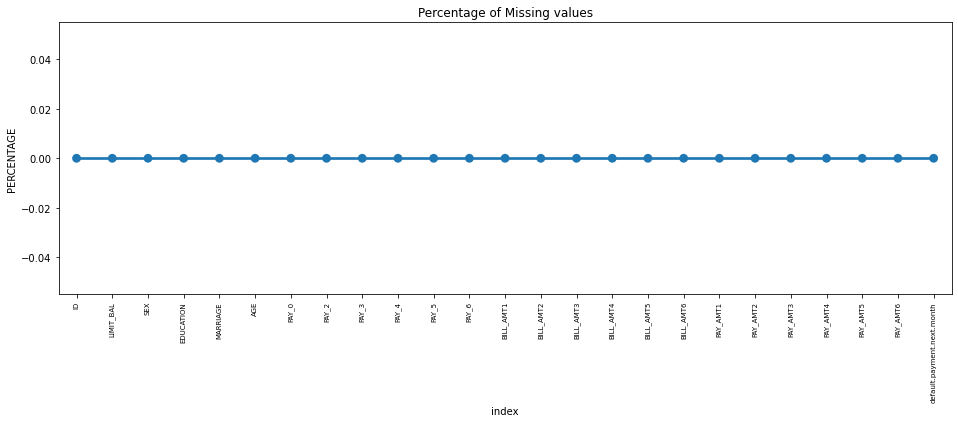

In [ ]:
#  Vẽ biểu đồ để kiểm tra missing value
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Duplicate values

In [ ]:
# duplicate
print('Duplicate of Credit card Data:', len(df[df.duplicated()]))

Duplicate of Credit card Data: 0


In [ ]:
# Kiểm tra tổng quan các giá trị của mỗi biến trong tập dữ liệu
nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='0']
for feature in nan:
  print('{}: {}'.format(col,df[col].unique()))
print(df.apply(lambda col: col.unique()))

ID                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LIMIT_BAL                     [20000.0, 120000.0, 90000.0, 50000.0, 500000.0...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                                       [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2                                       [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                                       [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                                       [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                                          [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                                          [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BILL_AMT1                     [3913.0, 2

Bộ dữ liệu không có missing value và giá trị duplicate.

## Phân tích chi tiết các biến của bộ dữ liệu

In [ ]:
# Thống kê mô tả dữ liệu
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Tần số của biến tình trạng vỡ nợ
df['default.payment.next.month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64


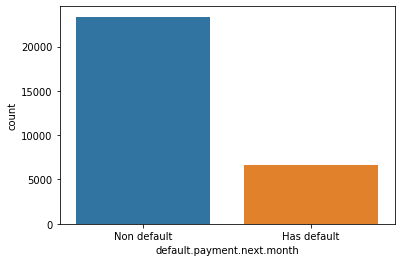

In [ ]:
# Biểu đồ thể hiện phân phối dữ liệu
print((df['default.payment.next.month'].value_counts()/df['default.payment.next.month'].shape)*100)
#sns.countplot(df['Default'])
g = sns.countplot(df['default.payment.next.month'])
g.set_xticklabels(['Non default', 'Has default'])
plt.show()

> Chúng ta có thể thấy bộ dữ liệu mất cân bằng với 77.88% khách hàng không bị vỡ nỡ và 22.12% khách hàng bị vỡ nợ.

In [ ]:
# Rename biến PAY_0 thành PAY_1 vì các biến BILL_AMT và PAY_AMT cũng bắt đầu từ 1
df = df.rename(columns={'PAY_0':'PAY_1'})
print(f'Tên của các cột :', list(df.columns))

Tên của các cột : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [ ]:
df = df.drop(columns = 'ID')

**Biến phân loại:**
* SEX
* EDUCATION
* MARRIAGE
* AGE

In [ ]:
# Phân phối của cột SEX. 1: male; 2: female
print('Phân phối của biến "SEX" 1: Male; 2: Female:')
df['SEX'].value_counts()

Phân phối của biến "SEX" 1: Male; 2: Female:


2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Biến EDUCATION: (1 = graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown)
print('Phân phối của biến "EDUCATION": 1 = Graduate school, 2  = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown, 0 = Unknown')
print(df['EDUCATION'].unique())
df['EDUCATION'].value_counts()

Phân phối của biến "EDUCATION": 1 = Graduate school, 2  = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown, 0 = Unknown
[2 1 3 5 4 6 0]


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Tồn tại một vài quan sát của biến EDUCATION có các mức không được định nghĩa là 0, 5 và 6, vì thế đổi các mức 0, 5, 6 thành 4 = Others
# 1 = Graduate school, 2 = University, 3 = High school, 4 = Others
print('Phân phối của biến EDUCATION: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others')
df["EDUCATION"] = df["EDUCATION"].replace({0:4,5:4,6:4})
df["EDUCATION"].value_counts()

Phân phối của biến EDUCATION: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# Tình trạng hôn nhân: (1 = Married, 2 = Single, 3 = Others)
print('Phân phối của biến "MARRIAGE: 1 = Married, 2 = Single, 3 = Others')
print(df['MARRIAGE'].unique())
df['MARRIAGE'].value_counts()

Phân phối của biến "MARRIAGE: 1 = Married, 2 = Single, 3 = Others
[1 2 3 0]


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
# Có một vài quan sát ở biến MARRIAGE có mức không được định nghĩa là 0 vì thế đổi mức 0 thành 3 = Others
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [ ]:
# Tạo dataframe mới giống với bộ dữ liệu
df_copy1 = df.copy()
df_copy2 = df_copy1.copy()

## Kiểm tra giá trị bất thường (Outlier)


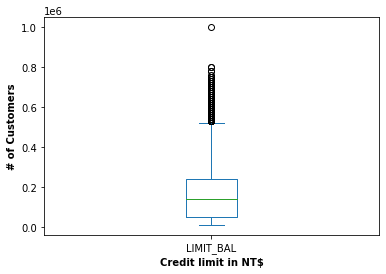

In [ ]:
# Xác định các giá trị outliers trong hạn mức tín dụng
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

In [ ]:
def remove_outlier_using_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    df_final_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final_output

In [ ]:
df['LIMIT_BAL'] = remove_outlier_using_IQR(df['LIMIT_BAL'])

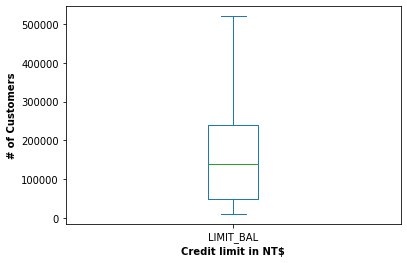

In [ ]:
# Kiểm tra các giá trị outlier đã được loại bỏ chưa
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

In [ ]:
#Lưu dữ liệu đã tiền xử lý
df.to_excel("Data_Processed.xlsx")

# EDA

In [ ]:
# Để dễ dàng gọi biến, đổi tên biến 'default.payment.next.month' thành ' default '
df.rename(columns = {'default.payment.next.month':'Default'}, inplace = True)

In [ ]:
# Tạo một cột mới "has_def" để chỉ ra khách hàng có ít nhất một khoản thanh toán mặc định từ PAY_1 đến PAY_6
# 0 : no default; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "has_def"] = 1
df.loc[df.has_def.isna(), "has_def"] = 0

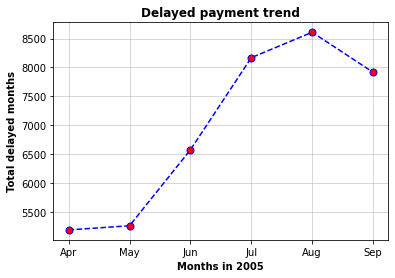

In [ ]:
has_default = df[df['has_def']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

#Vẽ một biểu đồ đường để thể hiện xu hướng. Số hóa đơn đã thanh toán càng thấp, thời gian thanh toán bị trì hoãn càng ngắn
fig,ax = plt.subplots()
ax.plot(default_trend,label="Test",color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=7)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

In [ ]:
df.drop('has_def', axis = 1, inplace = True)

**Biểu đồ phân phối về tình trạng vỡ nợ**

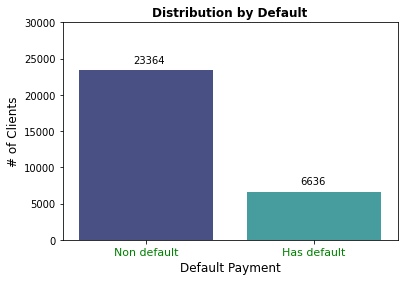

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Default", data=df, palette="mako")

plt.xlabel("Default Payment", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['Non default', 'Has default'], fontsize = 11, color='g')
plt.title('Distribution by Default',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

plt.show()

Số lượng nhóm khách hàng Non-default cao hơn nhóm khách hàng Default.

In [ ]:
plt.figure(figsize=(7,5))

df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['blue','yellow'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Non default', 'Has default'])
plt.title('Percentage of distribution by Default',weight ='bold')

plt.show()

NameError: ignored

<Figure size 504x360 with 0 Axes>

Từ biểu đồ tròn, dễ thấy có 77.9% khách hàng không bị vỡ nợ và 22.1% khách hàng bị vỡ nợ

**Biểu đồ phân phối của biến phân loại SEX**

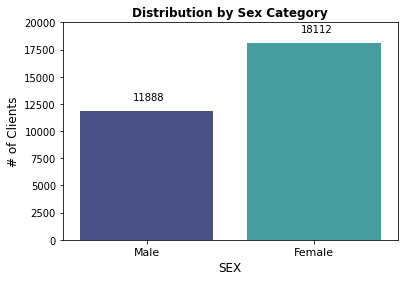

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="SEX", data=df, palette="mako")

plt.xlabel("SEX", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.title('Distribution by Sex Category',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

plt.show()

Nhóm khách hàng vay tín dụng ở doanh nghiệp này chủ yếu là nữ giới.

**Tình trạng vỡ nợ dựa theo biến SEX**

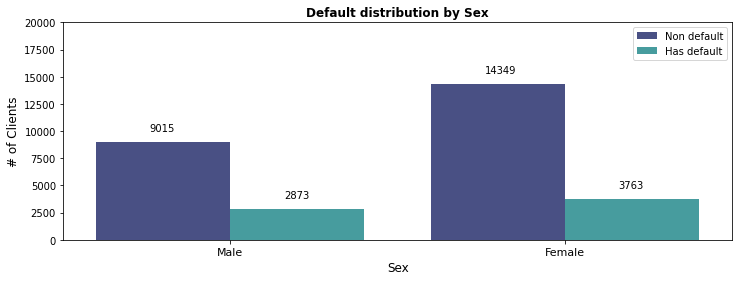

In [ ]:
# Dùng bar chart để biểu diễn trực quan tình trạng vỡ nợ theo giới tính
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

**Biểu đồ phân phối thể hiện trình độ học vấn**

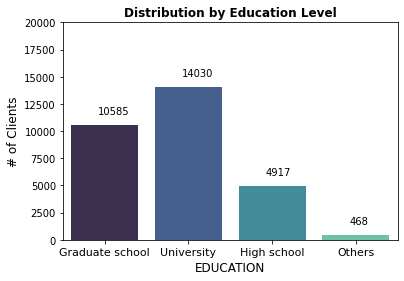

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="EDUCATION", data=df, palette="mako")

plt.xlabel("EDUCATION", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
plt.title('Distribution by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

plt.show()

Doanh nghiệp đang khai thác dữ liệu chủ yếu cấp tín dụng cho khách hàng có trình độ học vấn cao học và đại học

**Tình trạng vỡ nợ dựa trên trình độ học vấn**

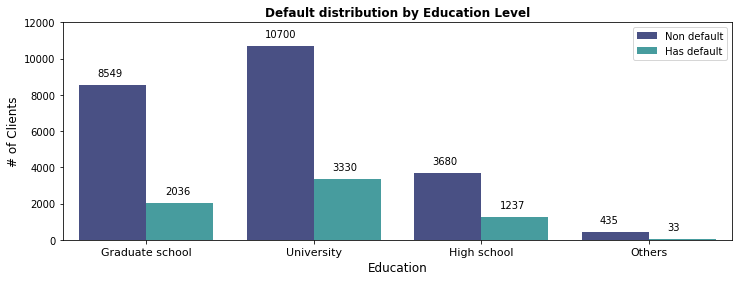

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'mako')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

**Mối quan hệ giữa trình độ học vấn và giới tính**

In [ ]:
df.groupby(by=['EDUCATION', 'SEX'])['Default'].value_counts(normalize = True)*100

EDUCATION  SEX  Default
1          1    0          79.191548
                1          20.808452
           2    0          81.864869
                1          18.135131
2          1    0          73.799777
                1          26.200223
           2    0          77.795749
                1          22.204251
3          1    0          72.613065
                1          27.386935
           2    0          76.358046
                1          23.641954
4          1    0          91.764706
                1           8.235294
           2    0          93.624161
                1           6.375839
Name: Default, dtype: float64

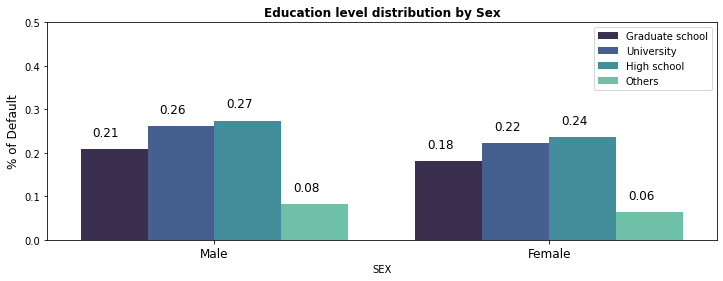

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.legend(labels=['Graduate school', 'University', 'High school', 'Others'])
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Education level distribution by Sex',weight ='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)
plt.show()

**Biểu đồ phân phối thể hiện tình trạng hôn nhân**

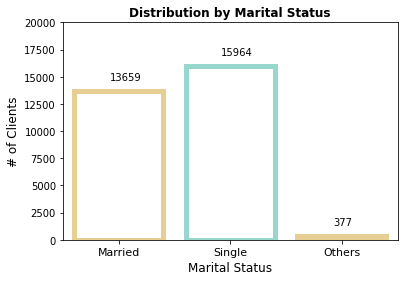

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="MARRIAGE", data=df, palette="mako", color="red", facecolor=(0,0,0,0) ,linewidth=5, edgecolor =sns.color_palette("BrBG",2))

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)
plt.title('Distribution by Marital Status',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))

plt.show()

**Tình trạng vỡ nợ dựa trên tình trạng hôn nhân**

In [ ]:
df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)

MARRIAGE  SEX  Default
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.710345
               1          0.289655
          2    0          0.797414
               1          0.202586
Name: Default, dtype: float64

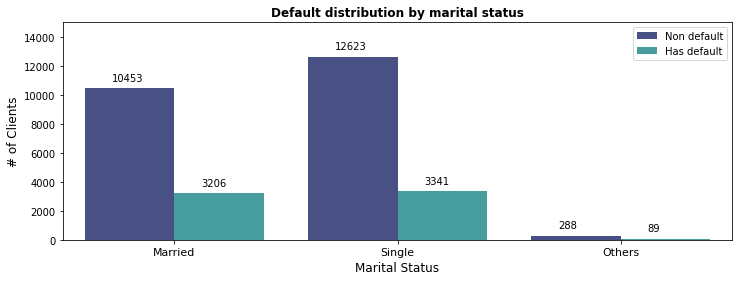

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'mako')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by marital status',weight ='bold')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

**Mối quan hệ giữa tình trạng hôn nhân và giới tính**

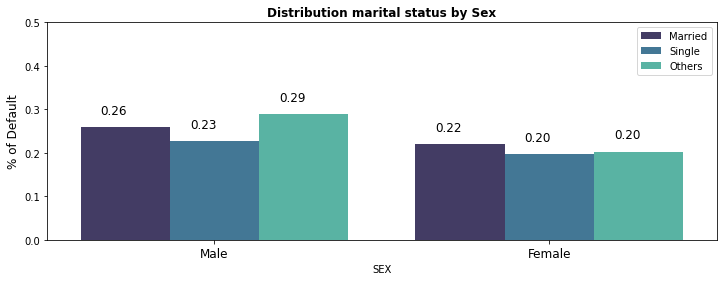

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.legend(labels=['Married', 'Single', 'Others'])
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Distribution marital status by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [ ]:
# Ở biến 'AGE', tạo các nhóm tuổi
df['Age_group'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['Age_group'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: Age_group, dtype: int64


In [ ]:
df['Default'].groupby(df['Age_group']).value_counts(normalize = True)*100

Age_group  Default
(20, 25]   0          73.340222
           1          26.659778
(25, 30]   0          79.851582
           1          20.148418
(30, 35]   0          80.572809
           1          19.427191
(35, 40]   0          78.381127
           1          21.618873
(40, 50]   0          76.702748
           1          23.297252
(50, 60]   0          74.762143
           1          25.237857
(60, 80]   0          73.161765
           1          26.838235
Name: Default, dtype: float64

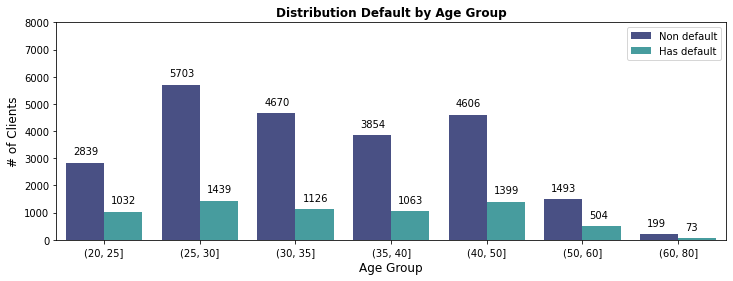

In [ ]:
# Biểu đồ thể hiện tình trạng vỡ nợ theo các nhóm tuổi
plt.figure(figsize=(12,4))

df['Age_group'] = df['Age_group'].astype('str')
Age_group_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'Age_group', hue="Default", palette = 'mako', order = Age_group_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Distribution Default by Age Group',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

**Dữ liệu số (Numerical data)**
* LIMIT_BAL
* PAY_X
* BILL_ATMX

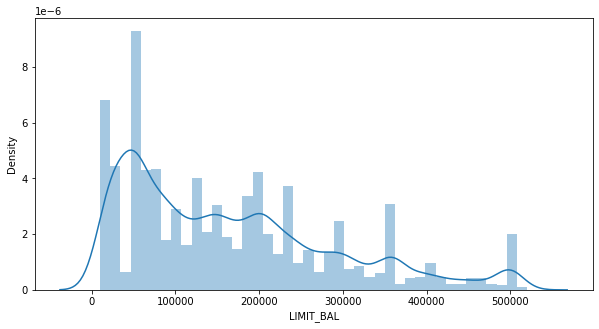

In [ ]:
# Biểu đồ phân phối của biến LIMIT_BAL
plt.figure(figsize=(10,5))
sns.distplot(df['LIMIT_BAL'], kde=True)
plt.show()

In [ ]:
df['Limit Balance'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['Limit Balance'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]      39
Name: Limit Balance, dtype: int64


> Từ hai dữ liệu trên, lượng tiền tín dụng được cung cấp tối đa là 50.000

In [ ]:
df['Default'].groupby(df['Limit Balance']).value_counts(normalize = True)*100

Limit Balance      Default
(5000, 50000]      0          68.212611
                   1          31.787389
(50000, 100000]    0          74.201576
                   1          25.798424
(100000, 150000]   0          78.856996
                   1          21.143004
(150000, 200000]   0          82.151835
                   1          17.848165
(200000, 300000]   0          83.949397
                   1          16.050603
(300000, 400000]   0          85.936934
                   1          14.063066
(400000, 500000]   0          87.859825
                   1          12.140175
(500000, 1100000]  0          89.743590
                   1          10.256410
Name: Default, dtype: float64

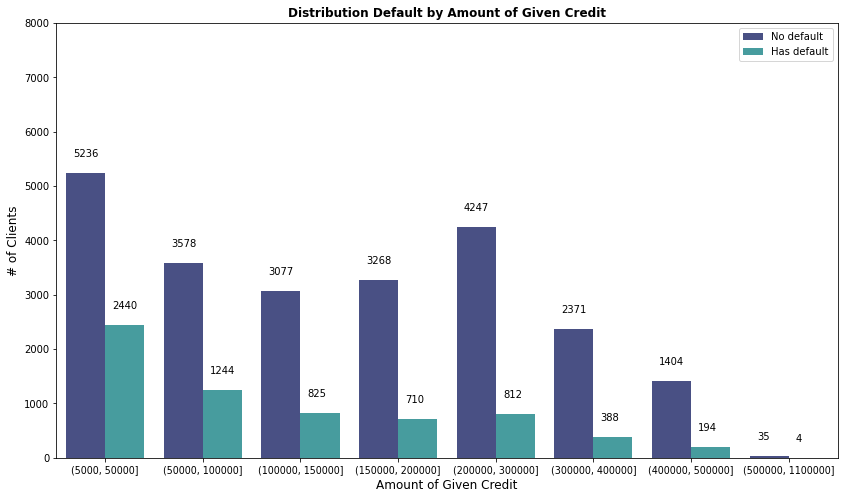

In [ ]:
plt.figure(figsize=(14,8))

df['Limit Balance'] = df['Limit Balance'].astype('str')
LimitBal_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'Limit Balance', hue="Default", palette = 'mako', order = LimitBal_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(labels=['No default', 'Has default'])
plt.title('Distribution Default by Amount of Given Credit',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [ ]:
df.groupby(by=['SEX', 'Limit Balance'])['Default'].value_counts(normalize = True)

SEX  Limit Balance      Default
1    (100000, 150000]   0          0.756659
                        1          0.243341
     (150000, 200000]   0          0.784381
                        1          0.215619
     (200000, 300000]   0          0.824561
                        1          0.175439
     (300000, 400000]   0          0.857399
                        1          0.142601
     (400000, 500000]   0          0.866022
                        1          0.133978
     (5000, 50000]      0          0.680268
                        1          0.319732
     (50000, 100000]    0          0.719975
                        1          0.280025
     (500000, 1100000]  0          0.857143
                        1          0.142857
     nan                0          0.906667
                        1          0.093333
2    (100000, 150000]   0          0.806208
                        1          0.193792
     (150000, 200000]   0          0.842750
                        1          0.157250


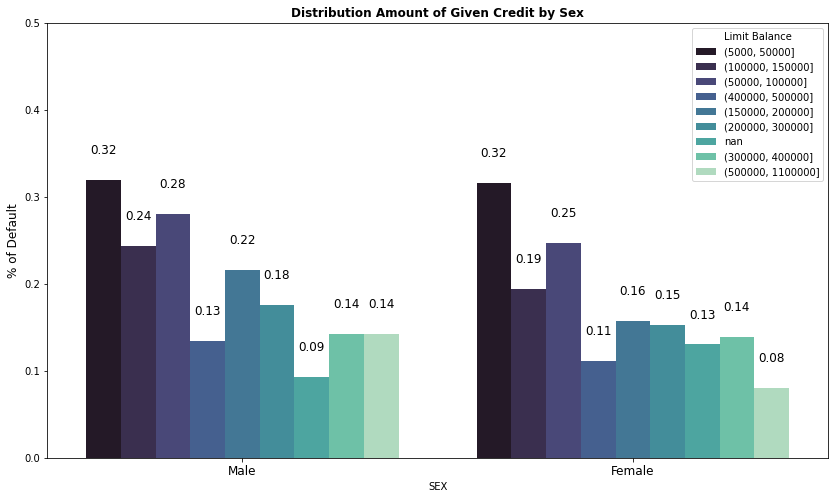

In [ ]:
plt.figure(figsize=(14,8))

ax = sns.barplot(x = "SEX", y = "Default", hue = "Limit Balance", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+0.03),fontsize=12)

plt.show()

In [ ]:
df.groupby(by=['MARRIAGE', 'Limit Balance'])['Default'].value_counts(normalize = True)*100

MARRIAGE  Limit Balance      Default
1         (100000, 150000]   0           77.330126
                             1           22.669874
          (150000, 200000]   0           80.156658
                             1           19.843342
          (200000, 300000]   0           81.903643
                             1           18.096357
          (300000, 400000]   0           85.575589
                             1           14.424411
          (400000, 500000]   0           86.555556
                             1           13.444444
          (5000, 50000]      0           65.117845
                             1           34.882155
          (50000, 100000]    0           71.394799
                             1           28.605201
          (500000, 1100000]  0           94.736842
                             1            5.263158
          nan                0           80.487805
                             1           19.512195
2         (100000, 150000]   0           80.0

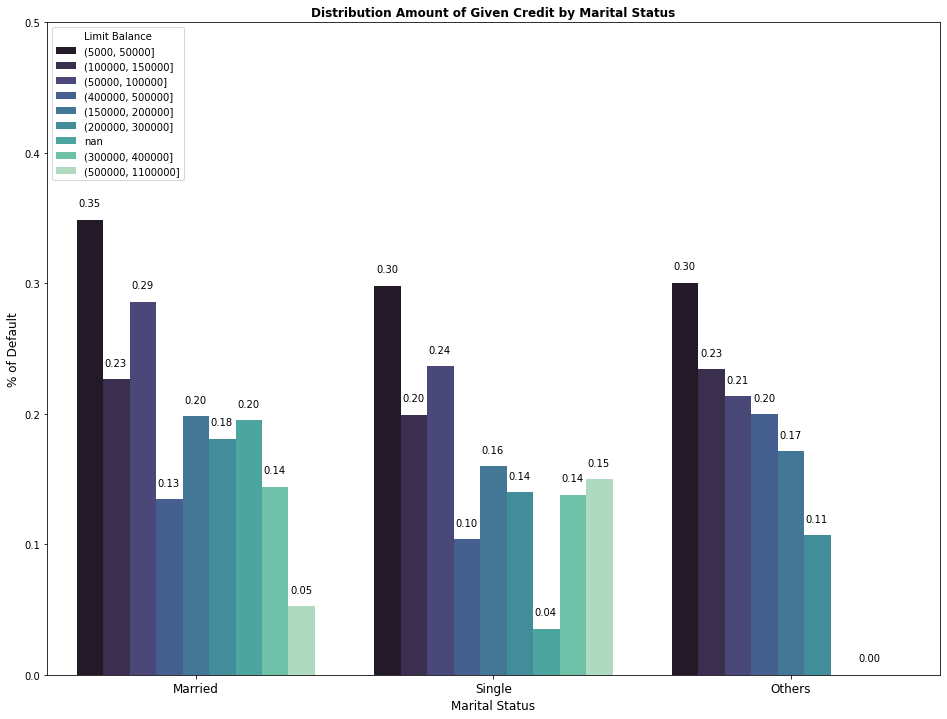

In [ ]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x = "MARRIAGE", y = "Default", hue = "Limit Balance", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.xlabel("Marital Status", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Marital Status',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.005, p.get_height()+0.01),fontsize=10)
plt.show()

In [ ]:
df.groupby(by=['EDUCATION', 'Limit Balance'])['Default'].value_counts(normalize = True)*100

EDUCATION  Limit Balance      Default
1          (100000, 150000]   0           78.257687
                              1           21.742313
           (150000, 200000]   0           82.121573
                              1           17.878427
           (200000, 300000]   0           83.972720
                                            ...    
4          (50000, 100000]    0           90.163934
                              1            9.836066
           (500000, 1100000]  0          100.000000
           nan                0           75.000000
                              1           25.000000
Name: Default, Length: 68, dtype: float64

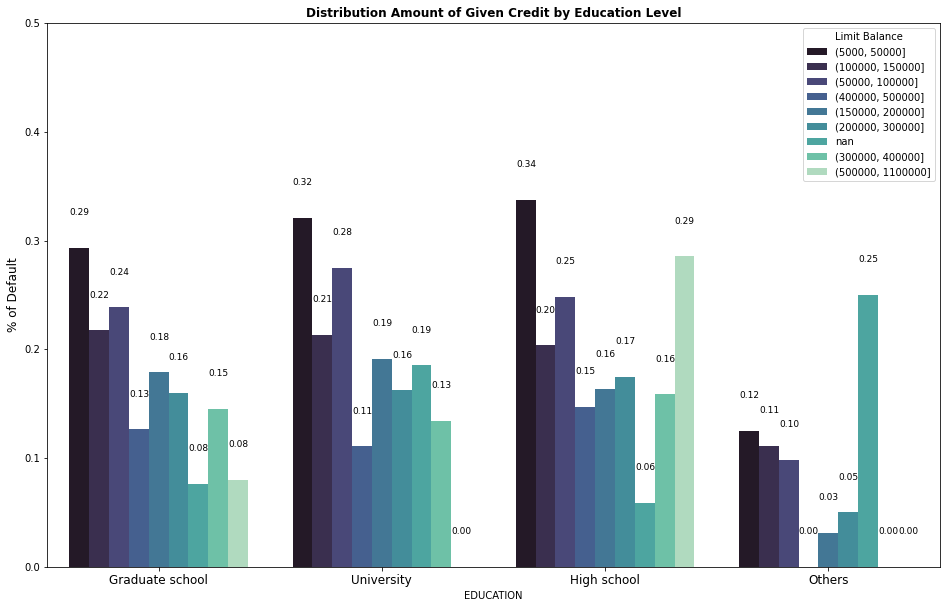

In [ ]:
plt.figure(figsize=(16,10))

ax = sns.barplot(x = "EDUCATION", y = "Default", hue = "Limit Balance", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.001, p.get_height()+0.03),fontsize=9)

plt.show()

In [ ]:
df.groupby(by=['Age_group', 'Limit Balance'])['Default'].value_counts(normalize = True)*100

Age_group  Limit Balance      Default
(20, 25]   (100000, 150000]   0           79.710145
                              1           20.289855
           (150000, 200000]   0           85.714286
                              1           14.285714
           (200000, 300000]   0           81.879195
                                            ...    
(60, 80]   (5000, 50000]      1           36.538462
           (50000, 100000]    0           75.609756
                              1           24.390244
           (500000, 1100000]  0          100.000000
           nan                0          100.000000
Name: Default, Length: 118, dtype: float64

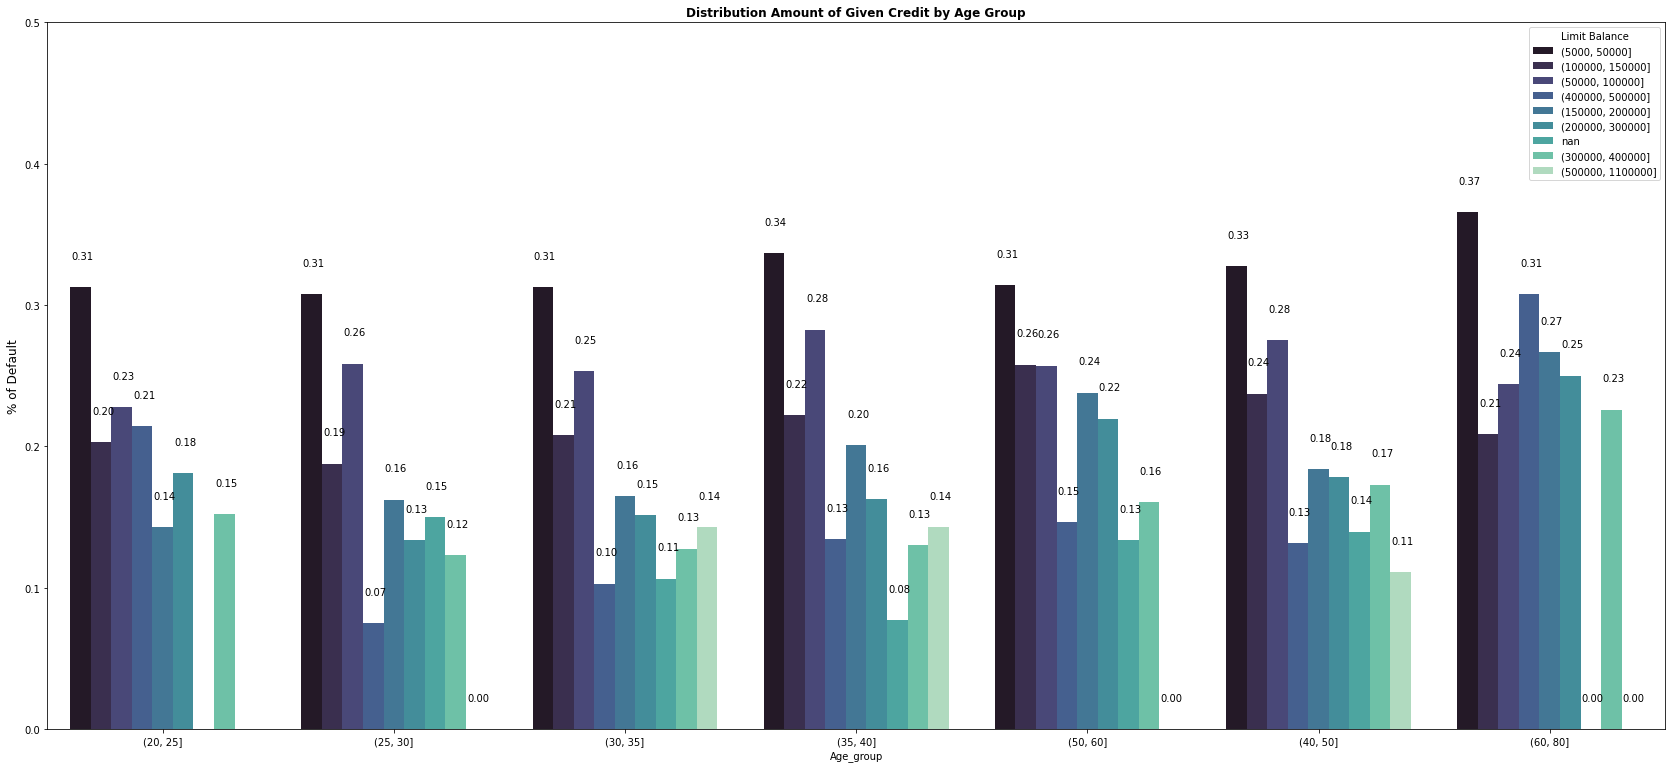

In [ ]:
plt.figure(figsize=(29,13))

ax = sns.barplot(x = "Age_group", y = "Default", hue = "Limit Balance", data = df,palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.title('Distribution Amount of Given Credit by Age Group',weight ='bold')


for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.005, p.get_height()+0.02),fontsize=10)

plt.show()

> Tình trạng trả nợ hằng tháng (trong 6 tháng) (PAY_X)

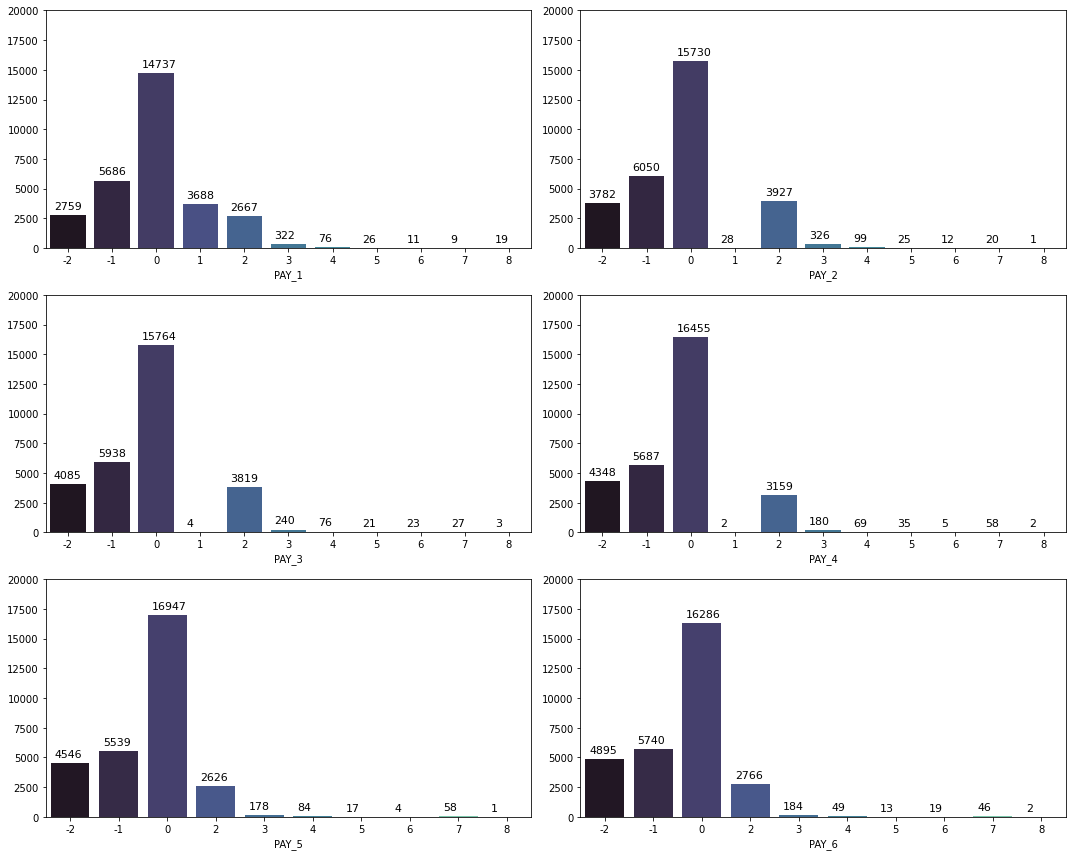

In [ ]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'mako')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

Càng trả nợ chậm, khả năng vỡ nợ càng cao.

> Lượng hóa đơn hằng tháng (trong 6 tháng)(BILL_AMTX)

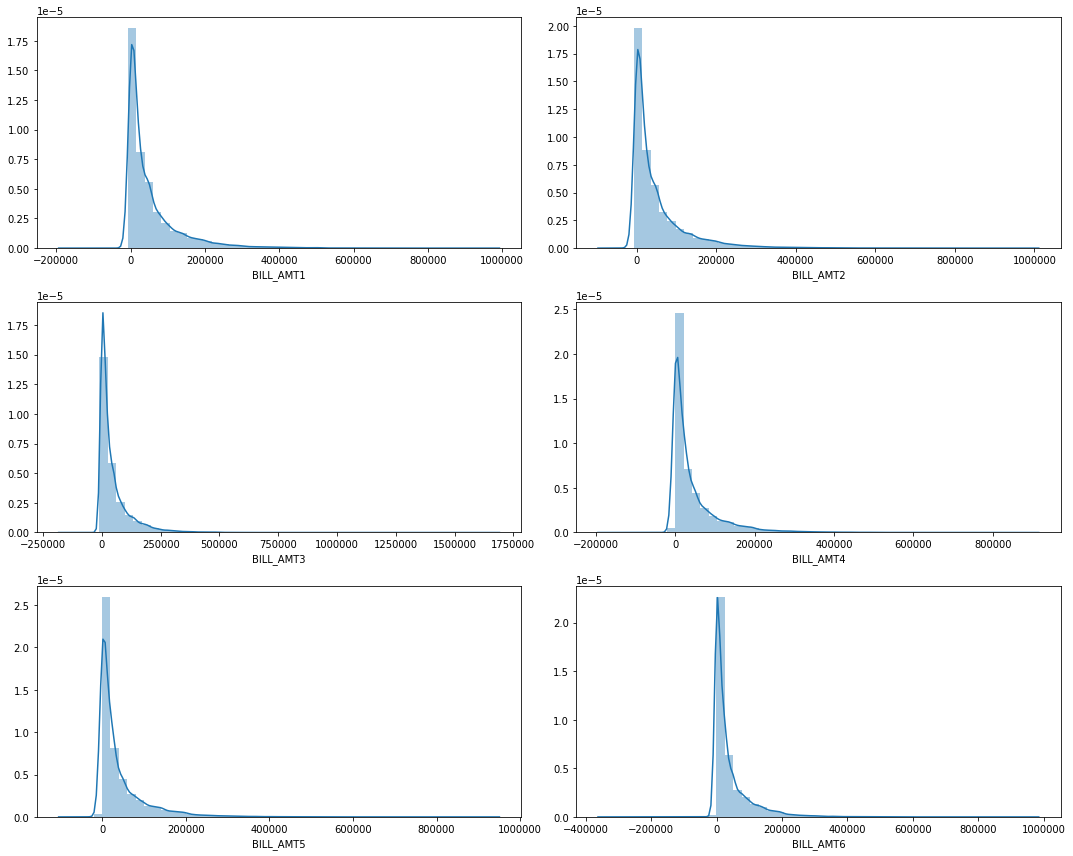

In [ ]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

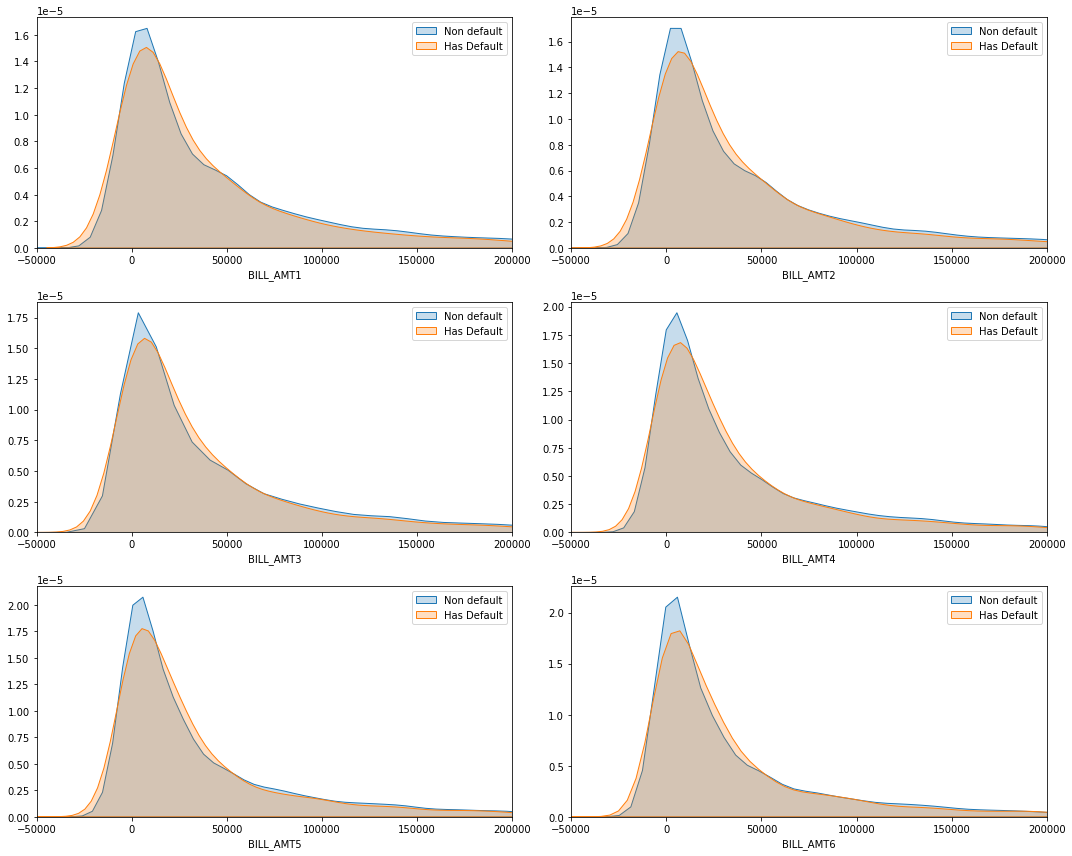

In [ ]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i + 1)
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'Non default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Has Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [ ]:
df.drop('Age_group', axis = 1, inplace = True)
df.drop('Limit Balance', axis = 1, inplace = True)

Default
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

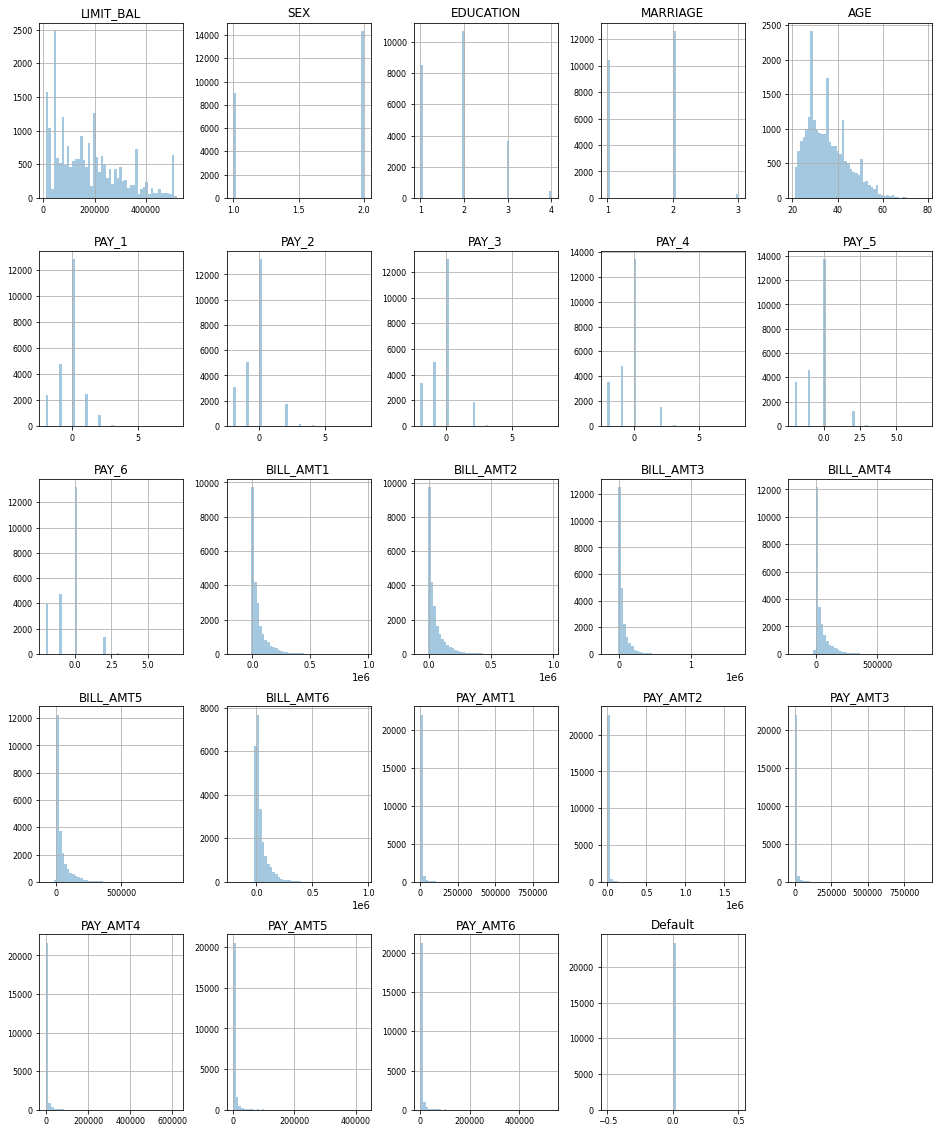

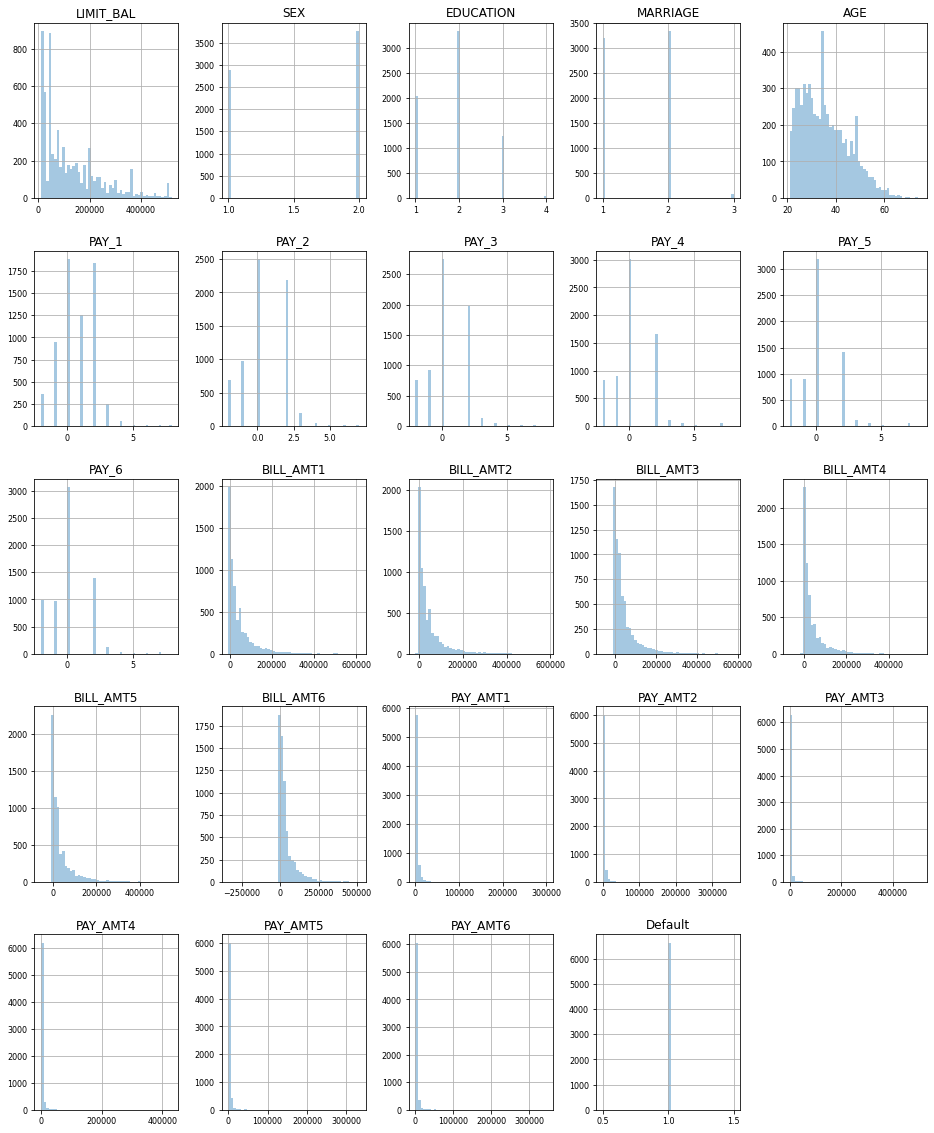

In [ ]:
# Trực quan hóa tình trạng vỡ nợ qua các biến
df.groupby('Default').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)


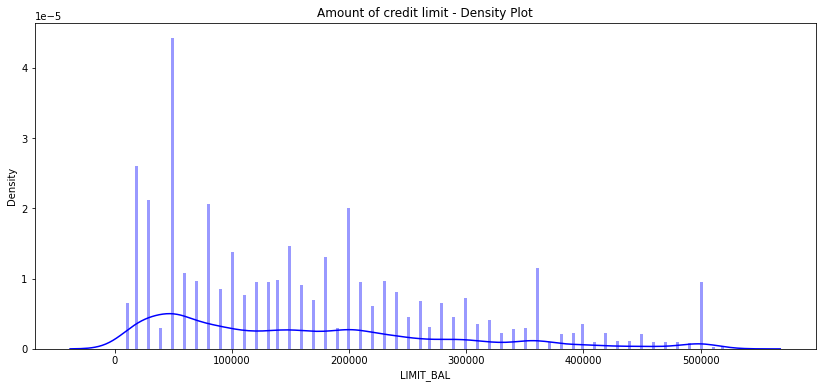

In [ ]:
# Biểu đồ mật độ về hạn mức tín dụng
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")

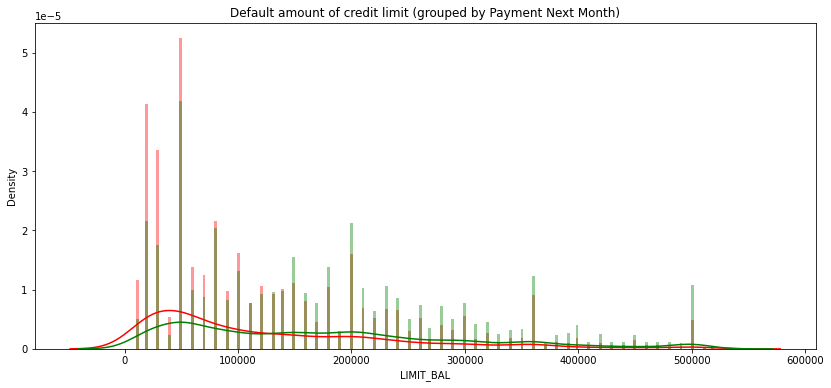

In [ ]:
class_0 = df.loc[df['Default'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['Default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit (grouped by Payment Next Month)')
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")

> Ma trận hệ số tương quan

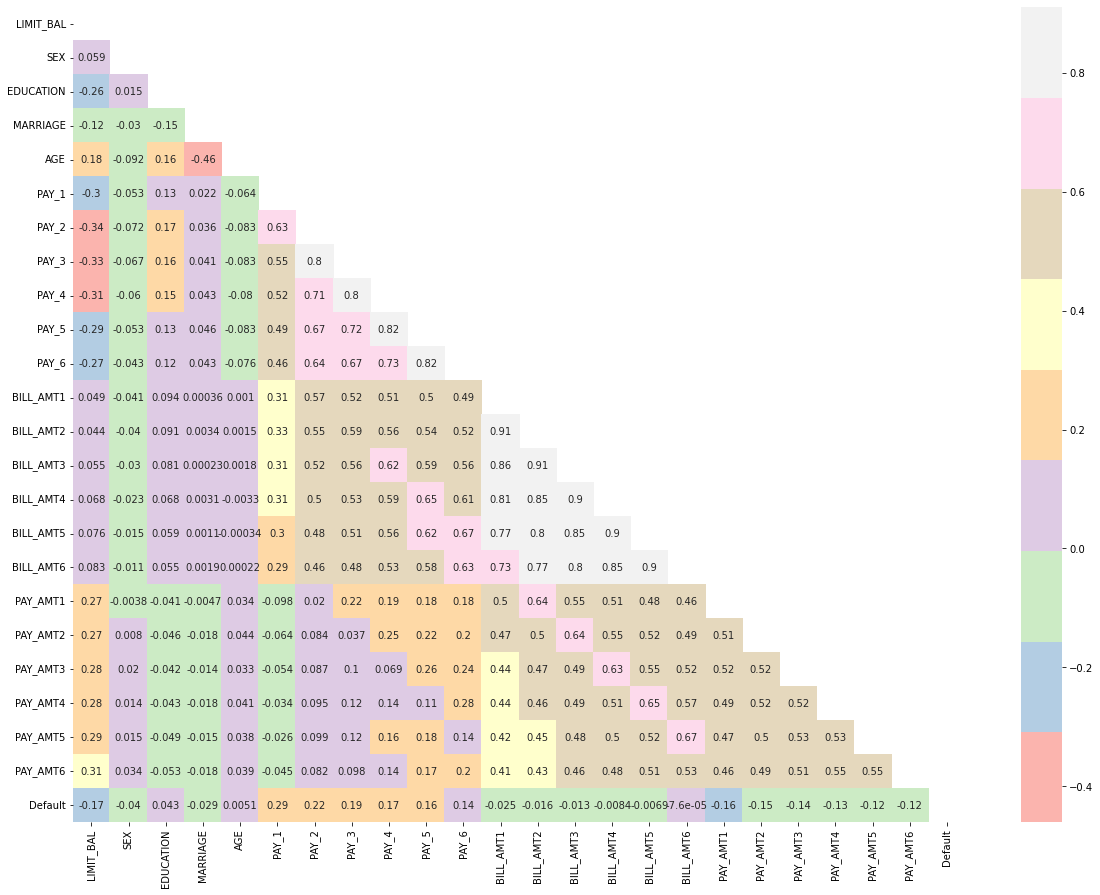

In [ ]:
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Pastel1', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.show()

# One - hot coding

In [ ]:
df_copy1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
df_copy1.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)

In [ ]:
# Các mức giá trị của mỗi cột phân loại
print("SEX", df_copy1.SEX.unique())
print('EDUCATION', df_copy1.EDUCATION.unique())
print('PAY_1', df_copy1.PAY_1.unique())
print('MARRIAGE', df_copy1.MARRIAGE.unique())
print('Default', df_copy1.Default.unique())

SEX [2 1]
EDUCATION ['university' 'graduate school' 'high school' 4]
PAY_1 [ 2 -1  0 -2  1  3  4  8  7  5  6]
MARRIAGE ['married' 'single' 'others']
Default [1 0]


In [ ]:
df_copy1['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

In [ ]:
df_copy1.replace({'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_copy1 = pd.get_dummies(df_copy1,columns=['EDUCATION','MARRIAGE'])

In [ ]:
#get dummies
df_copy1 = pd.get_dummies(df_copy1, columns = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6'], drop_first = True )

In [ ]:
df_copy1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3',
       'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1',
       'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7',
       'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6',
       'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3',
       'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8'],
      dtype='object')

In [ ]:
df_copy1.shape

(30000, 76)

In [ ]:
df_copy1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,2,university,married,24,3913.0,3102.0,689.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,2,university,single,26,2682.0,1725.0,2682.0,3272.0,3455.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,2,university,single,34,29239.0,14027.0,13559.0,14331.0,14948.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,2,university,married,37,46990.0,48233.0,49291.0,28314.0,28959.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,1,university,married,57,8617.0,5670.0,35835.0,20940.0,19146.0,...,0,0,1,0,0,0,0,0,0,0


# Giảm chiều dữ liệu

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print (df_copy2.head(5))
target = 'Default'
nb_of_fea = df_copy2.shape[1] -1
features = df_copy2.columns[:nb_of_fea]
print('* Số lượng features = %2d' %nb_of_fea)
print('  Các features:', ', '.join(features))

   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0       0.0       0.0    

In [ ]:
df.isnull().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_1                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default.payment.next.month    False
dtype: bool

In [ ]:
df['LIMIT_BAL'] = df['LIMIT_BAL'].fillna(df['LIMIT_BAL'].mean())

Biểu đồ phân tích phương sai tích lũy của PCA, với số chiều k biến thiên từ 1 đến 23.


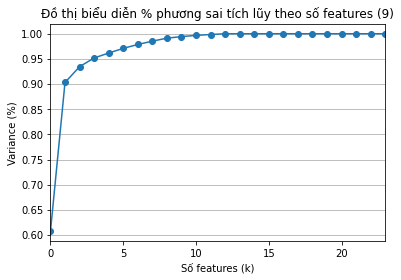

In [ ]:
#Biểu đồ phương sai tích luỹ
print ("Biểu đồ phân tích phương sai tích lũy của PCA, với số chiều k biến thiên từ 1 đến 23.")
pca = PCA().fit(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (9)')
plt.xlim(0, nb_of_fea)
plt.grid(axis = 'y')
plt.show()

       Principle Component 1  Principle Component 2  Principle Component 3  \
0             -160258.384426           83690.875731            -556.897231   
1             -113523.783502           -4778.270966            2724.831852   
2              -95012.548127           37396.152811           -2731.168901   
3              -63947.736155           97270.174876          -10189.646970   
4             -109100.572737           73615.995664           24527.816865   
...                      ...                    ...                    ...   
29995          204213.589916           40141.937049         -141809.270315   
29996          -98653.317335          -31079.044603            4771.010017   
29997         -133871.572097           84413.630025           26168.959641   
29998          -35434.263979           75147.842059           17642.254345   
29999          -63558.196356           97519.607768          -14262.907004   

       Principle Component 4  Principle Component 5  Principle 

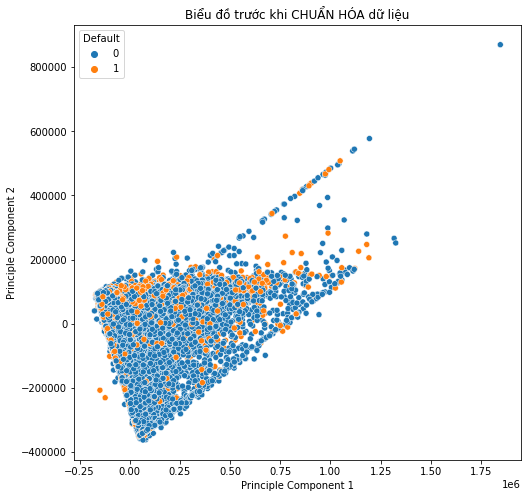

In [ ]:
#Giảm chiều dữ liệu
#Chọn k= 8 vì giữ lại được khoảng 99% phương sai tích luỹ
k = 8
pca = PCA(k)
pca.fit(df)
#Transform data
PC = ['Principle Component 1', 'Principle Component 2', 'Principle Component 3', 'Principle Component 4', 'Principle Component 5', 'Principle Component 6',
'Principle Component 7','Principle Component 8']
B = pca.transform(df)
principalDf = pd.DataFrame(data = B, columns = PC)
print (principalDf)
#Lấy và ghép cột phân lớp
y = np.array(df.Default)
y = pd.DataFrame(data = y, columns = [target])
finalDf = pd.concat([principalDf, y], axis = 1)
print('\n* Ma trận B_T (có thêm biến phân lớp Classification)')
print(finalDf.head(5))
#Trưc quan hoá dữ liệu có phân lớp (chưa chuẩn hoá)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ trước khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC[0], y = PC[1], data = finalDf, hue = target, legend = 'full')
plt.show()

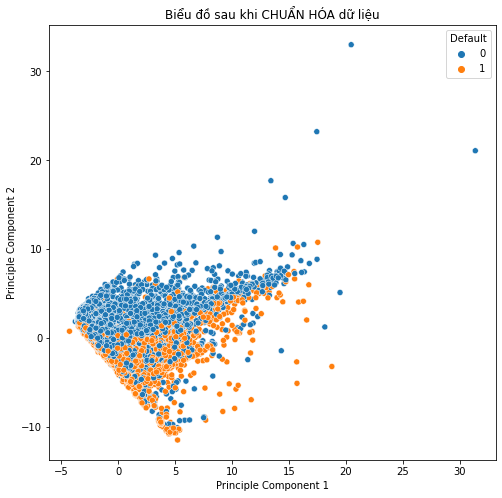

In [ ]:
pca_norm  = PCA(k)
data_norm = StandardScaler().fit_transform(df)
pca_norm.fit(data_norm)

# Transform data
B_norm           = pca_norm.transform(data_norm)
principalDf_norm = pd.DataFrame(data = B_norm, columns = PC)

# Lấy cột phân lớp (Class) trong file dữ liệu
y = np.array(df.Default)
y = pd.DataFrame(data = y, columns = [target])

# Ghép cột phân lớp (Class) vào ma trận PCA
finalDf_norm = pd.concat([principalDf_norm, y], axis = 1)

# Trực quan hóa dữ liệu (có PHÂN LỚP) (đã chuẩn hoá)
plt.figure(figsize = (8, 8))
plt.title('Biểu đồ sau khi CHUẨN HÓA dữ liệu')
sns.scatterplot(x = PC[0], y = PC[1], data = finalDf_norm, hue = target, legend = 'full')
plt.show()

# Máy học

In [ ]:
cat_columns = []
num_columns = []

for columns in df_copy1.columns:
    if df_copy1[columns].nunique()<12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'Default', 'EDUCATION_4', 'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',

In [ ]:
cat_columns.remove("Default")

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION_4', 'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4'

In [ ]:
data = df_copy.copy()
#Tạo tập dữ liệu X và y
y = data['Default']
X = data.drop('Default', axis=1)

#Scale Data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.136720,0.810161,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,...,-0.005774,-0.486419,-1.089746,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
1,-0.365981,0.810161,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,...,-0.005774,-0.486419,-1.089746,3.137832,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
2,-0.597202,0.810161,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
3,-0.905498,0.810161,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
4,-0.905498,-1.234323,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
29996,-0.134759,-1.234323,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
29997,-1.059646,-1.234323,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
29998,-0.674276,-1.234323,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,...,-0.005774,2.055841,-1.089746,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold

In [ ]:
# Transform các cột numerical để có phân phối Gauss
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

In [ ]:
#Xây dựng hàm đánh giá mô hình
def evaluate_clf (true, predicted):
    acc = accuracy_score(true, predicted)
    prec  = precision_score(true, predicted)
    f1  = f1_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true,predicted)
    return acc, prec, f1, recall, roc_auc

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
models = {
    "Random Forest" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVM" : SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(),
}

In [ ]:
models_list = []
#Tạo list lưu trữ kết quả đánh giá tập kiểm thử
list_accur_test = []
list_prec_test= []
list_recc_test = []
list_f1_test = []
list_auc_test = []
 #Tạo list lưu trữ kết quả đánh giá tập huấn luyện
list_accur_train = []
list_prec_train= []
list_recc_train = []
list_f1_train = []
list_auc_train = []
def clear_list():
  models_list.clear()
  list_accur_test.clear()
  list_prec_test.clear()
  list_recc_test.clear()
  list_f1_test.clear()
  list_auc_test.clear()
  list_accur_train.clear()
  list_prec_train.clear()
  list_recc_train.clear()
  list_f1_train.clear()
  list_auc_train.clear()

In [ ]:
def evaluate_models(X, y, models):


    for name, model in models.items():


        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(name,':')
        models_list.append(name)
        list_accur_test.append(model_test_accuracy)
        list_prec_test.append(model_test_precision)
        list_recc_test.append(model_test_recall)
        list_f1_test.append(model_test_f1)
        list_auc_test.append(model_test_rocauc_score)

        list_accur_train.append(model_train_accuracy)
        list_prec_train.append(model_train_precision)
        list_recc_train.append(model_train_recall)
        list_f1_train.append(model_train_f1)
        list_auc_train.append(model_train_rocauc_score)

        print('Hiệu năng mô hình trên tập dữ liệu huấn luyện')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Hiệu năng mô hình trên tập dữ liệu kiểm thử')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

        print('\n')


# Huấn luyện mô hình

In [ ]:
report_1= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9995
- F1 score: 0.9994
- Precision: 0.9988
- Recall: 0.9981
- Roc Auc Score: 0.9990
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8148
- F1 score: 0.6411
- Precision: 0.4524
- Recall: 0.3496
- Roc Auc Score: 0.6474


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8215
- F1 score: 0.6879
- Precision: 0.4700
- Recall: 0.3569
- Roc Auc Score: 0.6554
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8172
- F1 score: 0.6598
- Precision: 0.4485
- Recall: 0.3397
- Roc Auc Score: 0.6453


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8450
- F1 score: 0.7245
- Precision: 0.5815
- Recall: 0.4856
- Roc Auc Score: 0.7165
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7923
- F1 score: 0.5396
- Precision: 0.4226
- Recal

In [ ]:
print (models_list)
print (list_accur_test)
print (list_accur_train)

['Random Forest', 'Logistic Regression', 'KNeighborsClassifier', 'SVM', 'Decision Tree', 'Neural Network']
[0.8148333333333333, 0.8171666666666667, 0.7923333333333333, 0.8198333333333333, 0.7256666666666667, 0.803]
[0.9994583333333333, 0.8214583333333333, 0.8449583333333334, 0.8294166666666667, 0.9994583333333333, 0.8617083333333333]


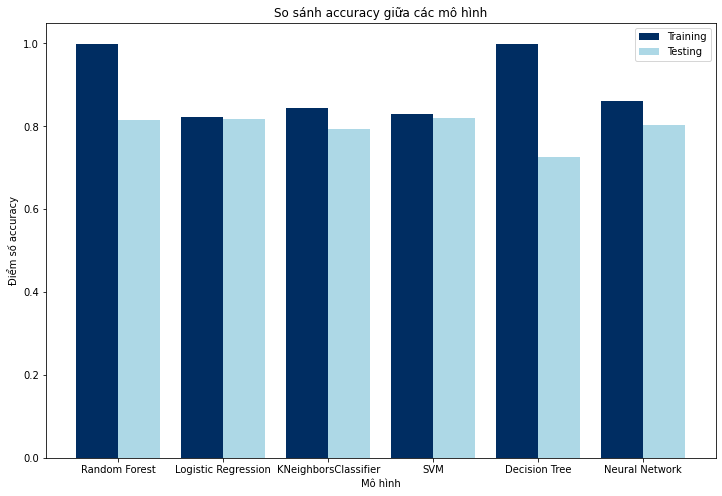

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_accur_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_accur_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số accuracy")
plt.title("So sánh accuracy giữa các mô hình")
plt.legend()
plt.show()

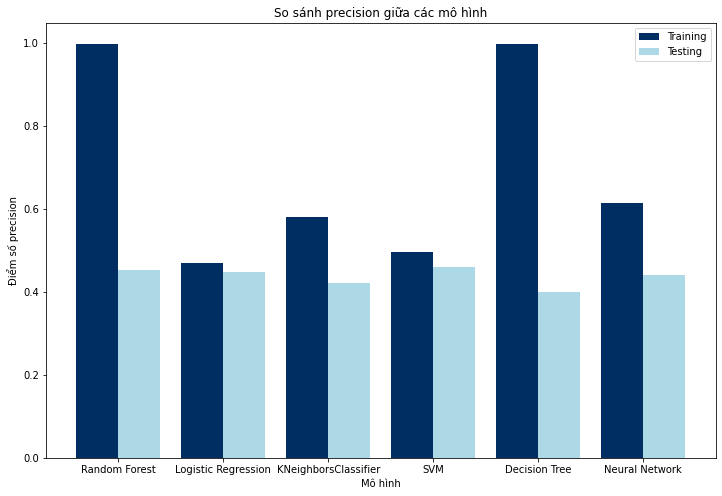

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_prec_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_prec_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số precision")
plt.title("So sánh precision giữa các mô hình")
plt.legend()
plt.show()

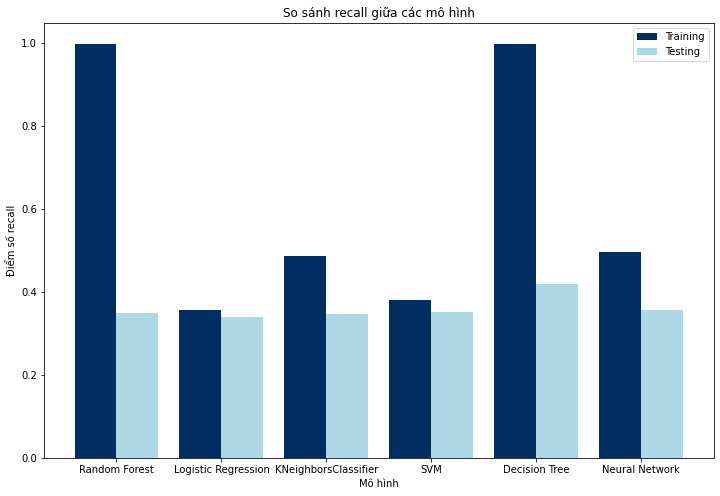

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_recc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_recc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số recall")
plt.title("So sánh recall giữa các mô hình")
plt.legend()
plt.show()

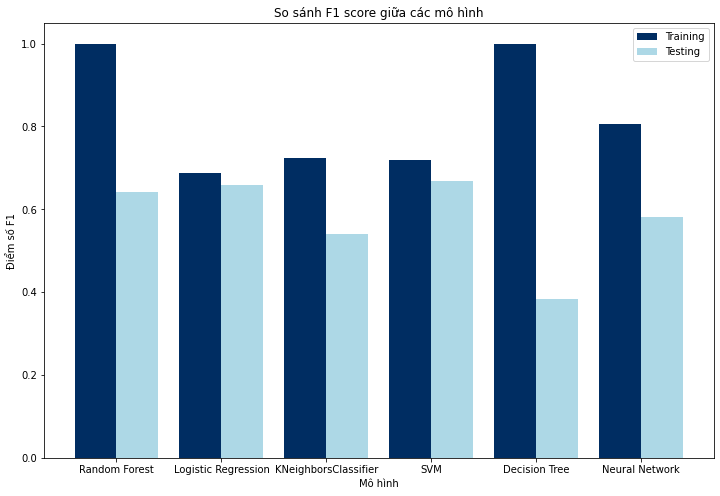

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_f1_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_f1_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số F1")
plt.title("So sánh F1 score giữa các mô hình")
plt.legend()
plt.show()

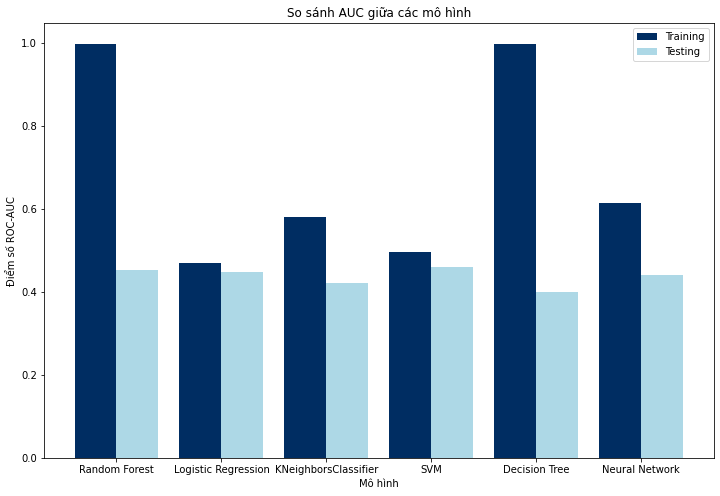

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_prec_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_prec_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số ROC-AUC")
plt.title("So sánh AUC giữa các mô hình")
plt.legend()
plt.show()

**Nhận xét:**
* Như ta thấy hầu hết các thuật toán máy học không hoạt động tốt với các bộ dữ liệu không cân bằng và cần sử dụng các phương pháp để cải thiện tình trạng mất cân bằng này


#Xử lý dữ liệu mất cân bằng

Ở đây ta dùng 2 kĩ thuật chính để xử lý dữ liệu mất cân bằng:

1.   UnderSampling
  *   Random UnderSampling
  *   NearMiss
2.   OverSampling
  *   Random OverSampling (Xử dụng thư viện có sẵn)
  *   Smote








## UnderSampling

Mô tả dữ liệu với thuật toán UnderSampling

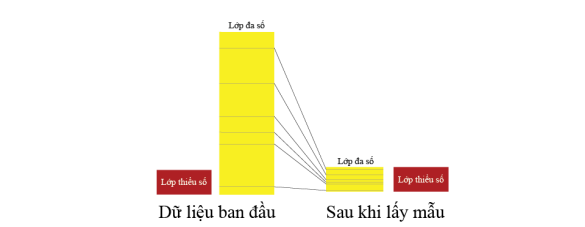

### Random UnderSampling

In [ ]:
dataset_0 = df_copy[df_copy.Default==0]
dataset_1 = df_copy[df_copy.Default==1]
dataset_0.shape, dataset_1.shape

((23364, 81), (6636, 81))

In [ ]:
dataset_0_rus = dataset_0.sample(dataset_1.shape[0])
dataset_0_rus.shape

(6636, 81)

In [ ]:
dataset_test_under = pd.concat([dataset_0_rus,dataset_1], axis= 0)
dataset_test_under.shape

(13272, 81)

In [ ]:
#Tạo tập dữ liệu X và y
y = dataset_test_under['Default']
X = dataset_test_under[df_copy.columns.difference(['Default'])]
# Tiến hành One-hot coding cho các biến định danh cho biến Sex(Giới tính):
X = pd.get_dummies(X,columns=['SEX'], drop_first = True)
# #Scale our Data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_4,EDUCATION_graduate school,EDUCATION_high school,...,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2
0,2.056018,-0.040310,-0.007865,-0.066299,-0.369447,-0.318755,-0.309161,-0.109059,-0.722388,2.215072,...,-0.034742,-0.055667,-0.012277,-0.204947,-0.177314,-0.238785,-0.168710,-0.295399,-0.216566,0.835887
1,0.570061,-0.638983,-0.684051,-0.677068,-0.671124,-0.635747,-0.631921,-0.109059,-0.722388,2.215072,...,-0.034742,-0.055667,-0.012277,-0.309220,-0.259542,-0.281471,-0.196799,-0.231966,-0.240988,0.835887
2,-0.491336,2.117776,2.211565,2.311302,2.532035,2.698798,2.780892,-0.109059,-0.722388,-0.451453,...,-0.034742,-0.055667,-0.012277,0.175391,0.140287,0.264719,0.269439,0.235484,0.169609,0.835887
3,-0.809756,-0.604626,0.326415,0.452750,0.509119,0.536383,0.560922,-0.109059,-0.722388,-0.451453,...,-0.034742,-0.055667,-0.012277,4.436311,0.097135,-0.280190,-0.079959,-0.089532,-0.112242,-1.196334
4,-0.597476,-0.661496,-0.578601,-0.575987,-0.553207,-0.538622,-0.538448,-0.109059,1.384298,-0.451453,...,-0.034742,-0.055667,-0.012277,0.170487,-0.208596,-0.220491,-0.280786,-0.276553,-0.229964,0.835887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,-0.172917,-0.650109,-0.648416,-0.640268,-0.631697,-0.616678,-0.604708,-0.109059,-0.722388,-0.451453,...,-0.034742,-0.055667,-0.012277,-0.326553,-0.259542,-0.281471,-0.290943,-0.295399,-0.277467,-1.196334
13268,-0.172917,0.315745,0.423583,0.491449,0.551401,0.704719,0.717428,-0.109059,-0.722388,-0.451453,...,-0.034742,-0.055667,-0.012277,0.143747,-0.081229,-0.281471,0.199392,-0.295399,-0.033862,-1.196334
13269,0.145502,-0.635426,-0.636215,-0.636471,-0.341864,-0.318408,-0.321364,-0.109059,-0.722388,-0.451453,...,-0.034742,-0.055667,-0.012277,-0.326553,-0.259542,1.060068,0.003258,-0.158837,-0.088674,-1.196334
13270,0.570061,-0.707254,0.433147,0.446112,0.161156,-0.462364,0.175954,-0.109059,-0.722388,2.215072,...,-0.034742,-0.055667,-0.012277,5.444702,-0.085865,-0.209637,-0.156031,3.321021,-0.167602,-1.196334


In [ ]:
y

12792    0
13825    0
26035    0
29369    0
8088     0
        ..
29991    1
29994    1
29997    1
29998    1
29999    1
Name: Default, Length: 13272, dtype: int64

In [ ]:
 # Tạo tập train và test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Transfrom để có phân phối Gauss
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# clear list for visualization
clear_list()

In [ ]:
report_2= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9992
- F1 score: 0.9987
- Precision: 0.9992
- Recall: 0.9996
- Roc Auc Score: 0.9992
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6817
- F1 score: 0.7213
- Precision: 0.6521
- Recall: 0.5950
- Roc Auc Score: 0.6820


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7190
- F1 score: 0.7788
- Precision: 0.6850
- Recall: 0.6113
- Roc Auc Score: 0.7190
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6919
- F1 score: 0.7512
- Precision: 0.6522
- Recall: 0.5763
- Roc Auc Score: 0.6922


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7771
- F1 score: 0.7839
- Precision: 0.7741
- Recall: 0.7646
- Roc Auc Score: 0.7770
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6550
- F1 score: 0.6653
- Precision: 0.6458
- Recal

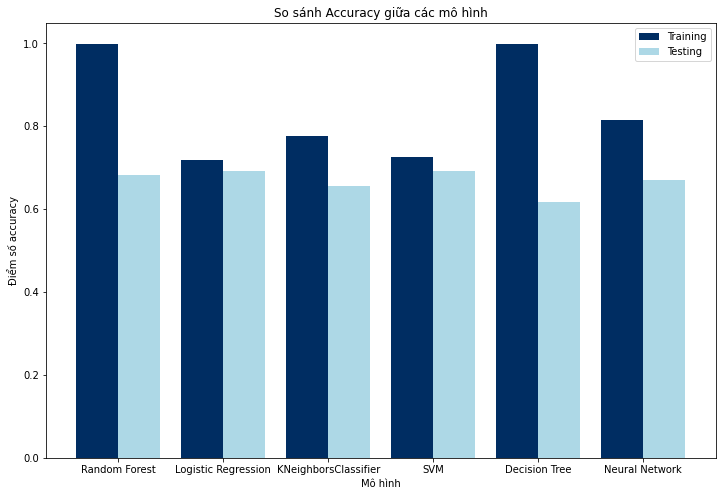

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_accur_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_accur_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số accuracy")
plt.title("So sánh Accuracy giữa các mô hình")
plt.legend()
plt.show()

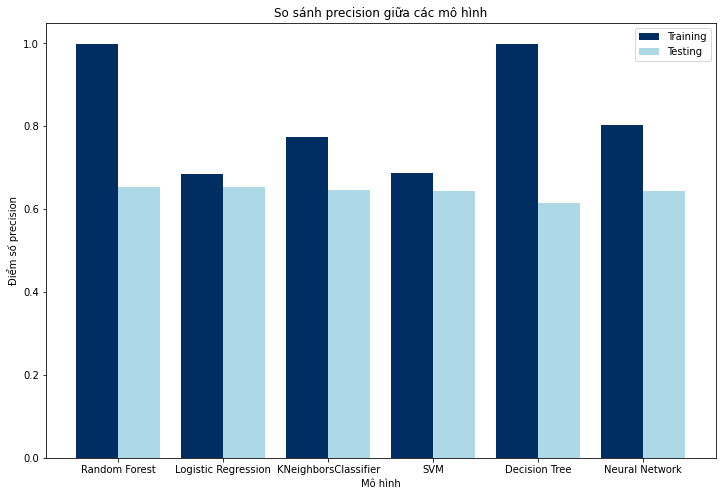

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_prec_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_prec_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số precision")
plt.title("So sánh precision giữa các mô hình")
plt.legend()
plt.show()

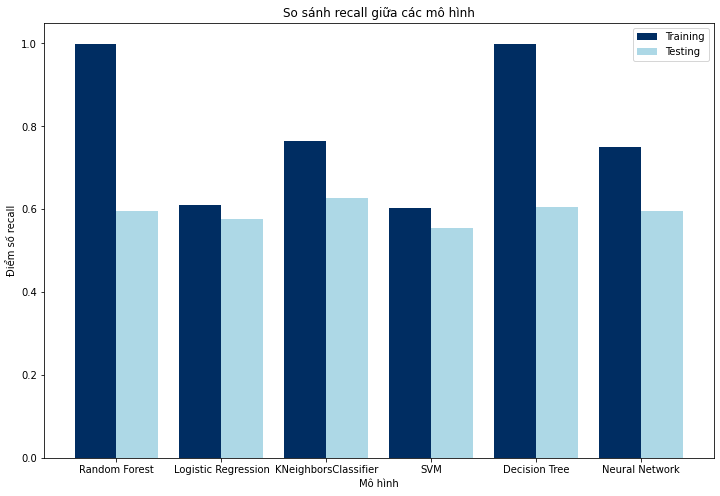

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_recc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_recc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số recall")
plt.title("So sánh recall giữa các mô hình")
plt.legend()
plt.show()

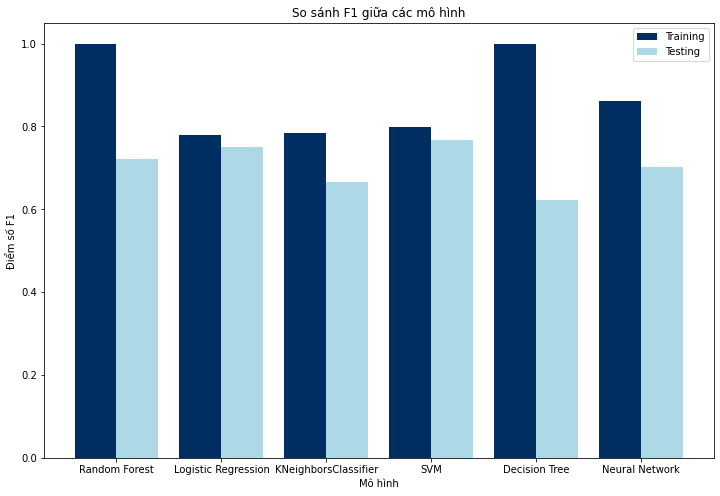

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_f1_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_f1_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số F1")
plt.title("So sánh F1 giữa các mô hình")
plt.legend()
plt.show()

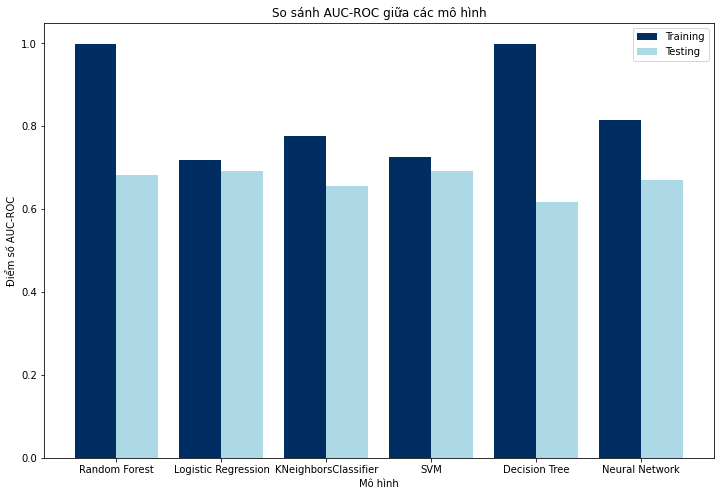

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_auc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_auc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số AUC-ROC")
plt.title("So sánh AUC-ROC giữa các mô hình")
plt.legend()
plt.show()

### NearMiss
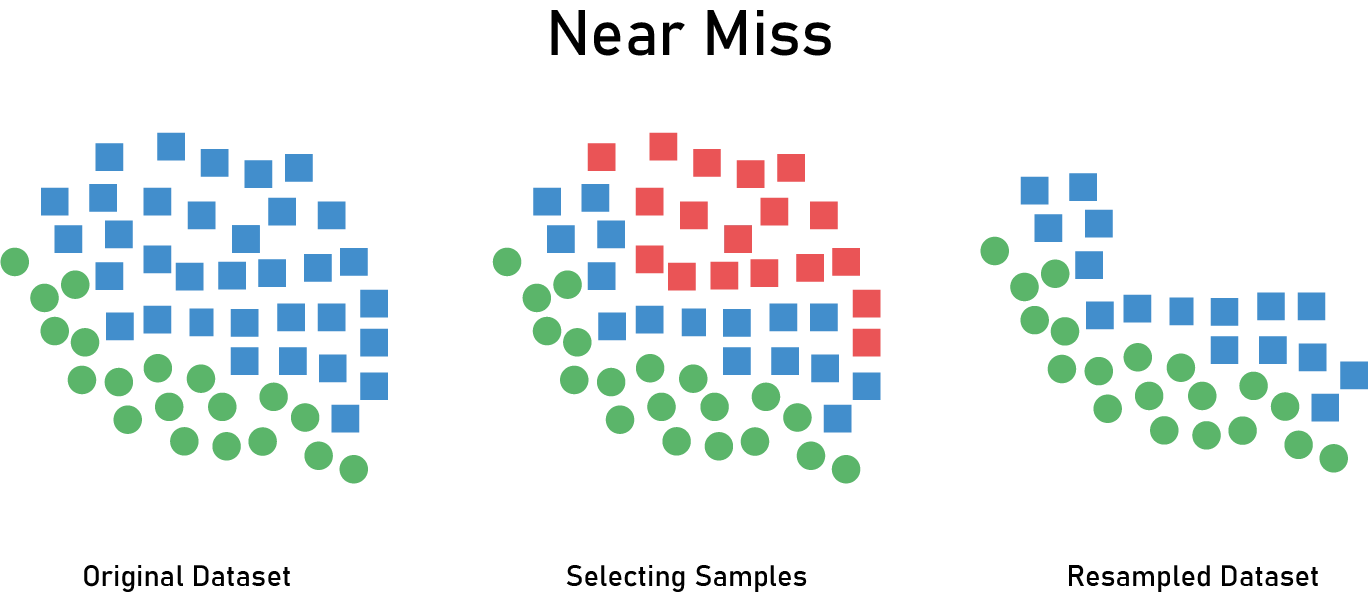

In [ ]:
X = df_copy[df_copy.columns.difference(['Default'])]
y = df_copy['Default']
# Tiến hành One-hot coding cho các biến định danh cho biến Sex(Giới tính):
X = pd.get_dummies(X,columns=['SEX'], drop_first = True)
from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_near, y_near = nm.fit_resample(X,y)
X_near.shape, y_near.shape

((13272, 80), (13272,))

In [ ]:
 # Tạo tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_near,y_near,test_size=0.2,random_state=42)

# Transfrom để có phân phối Gauss
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# Clear list for visualization
clear_list()

In [ ]:
report_3= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9985
- F1 score: 0.9981
- Precision: 0.9985
- Recall: 0.9989
- Roc Auc Score: 0.9985
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7559
- F1 score: 0.7901
- Precision: 0.7416
- Recall: 0.6987
- Roc Auc Score: 0.7561


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7213
- F1 score: 0.7850
- Precision: 0.6859
- Recall: 0.6090
- Roc Auc Score: 0.7212
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7062
- F1 score: 0.7725
- Precision: 0.6670
- Recall: 0.5868
- Roc Auc Score: 0.7065


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7897
- F1 score: 0.8483
- Precision: 0.7701
- Recall: 0.7052
- Roc Auc Score: 0.7896
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6798
- F1 score: 0.7407
- Precision: 0.6352
- Recal

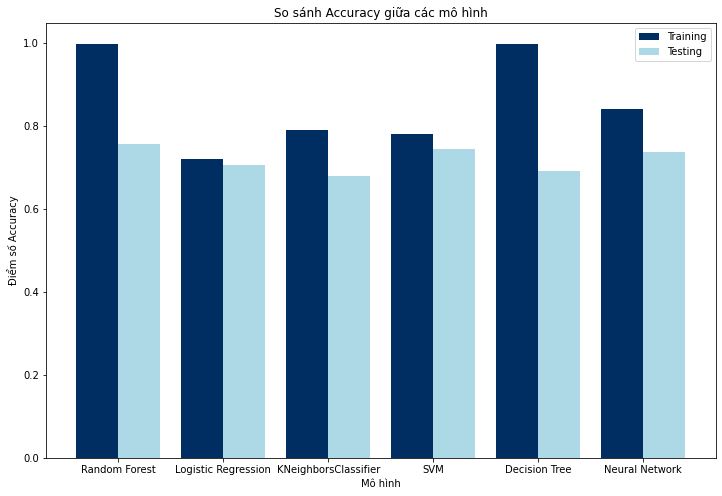

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_accur_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_accur_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Accuracy")
plt.title("So sánh Accuracy giữa các mô hình")
plt.legend()
plt.show()

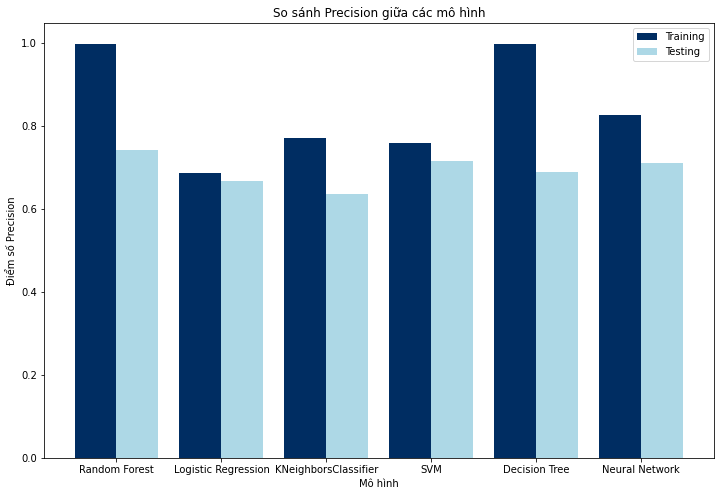

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_prec_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_prec_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Precision")
plt.title("So sánh Precision giữa các mô hình")
plt.legend()
plt.show()

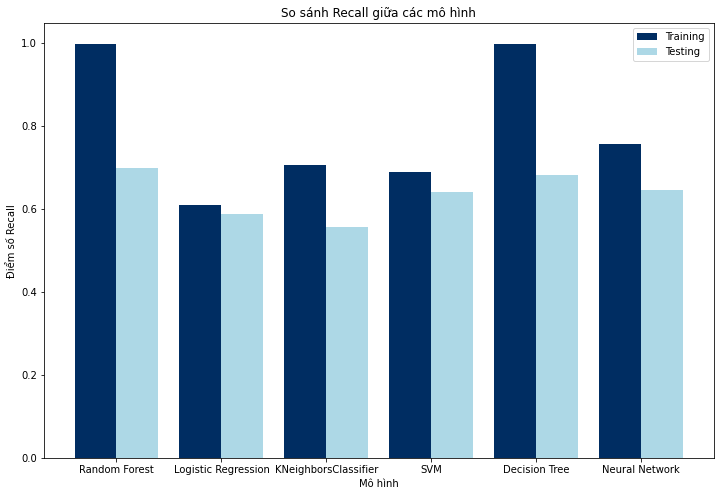

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_recc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_recc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Recall")
plt.title("So sánh Recall giữa các mô hình")
plt.legend()
plt.show()

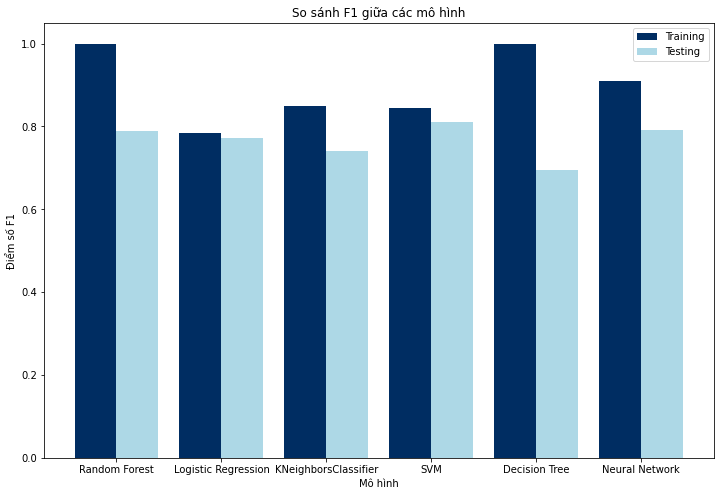

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_f1_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_f1_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số F1")
plt.title("So sánh F1 giữa các mô hình")
plt.legend()
plt.show()

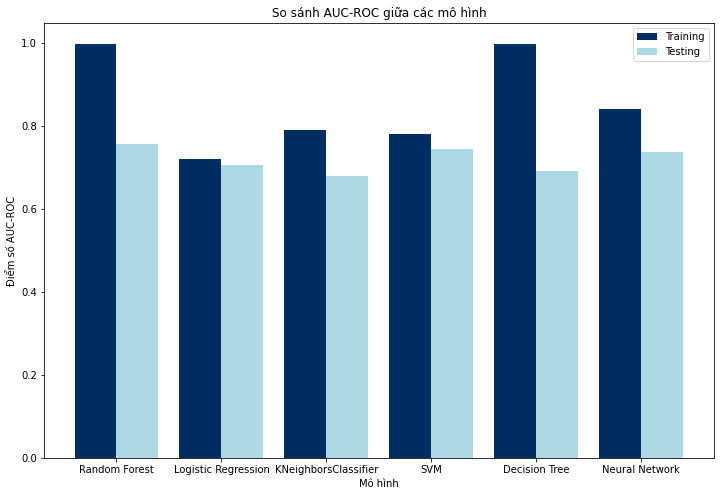

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_auc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_auc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số AUC-ROC")
plt.title("So sánh AUC-ROC giữa các mô hình")
plt.legend()
plt.show()

## OverSampling

Mô tả dữ liệu với thuật toán OverSampling:

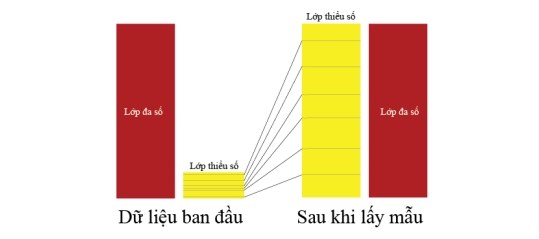

### Random OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X = df_copy[df_copy.columns.difference(['Default'])]
y = df_copy['Default']

# Tiến hành One-hot coding cho các biến định danh cho biến Sex(Giới tính):
X = pd.get_dummies(X,columns=['SEX'], drop_first = True)
from imblearn.under_sampling import NearMiss

X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape

((46728, 80), (46728,))

In [ ]:
# Tạo tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)



# Transfrom để có phân phối Gauss
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# Clear list for visualization
clear_list()

In [ ]:
report_4= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9996
- F1 score: 0.9992
- Precision: 0.9996
- Recall: 1.0000
- Roc Auc Score: 0.9996
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.9364
- F1 score: 0.9093
- Precision: 0.9386
- Recall: 0.9699
- Roc Auc Score: 0.9364


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7138
- F1 score: 0.7602
- Precision: 0.6855
- Recall: 0.6241
- Roc Auc Score: 0.7137
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7049
- F1 score: 0.7521
- Precision: 0.6755
- Recall: 0.6130
- Roc Auc Score: 0.7051


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8441
- F1 score: 0.7945
- Precision: 0.8561
- Recall: 0.9281
- Roc Auc Score: 0.8441
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7564
- F1 score: 0.7207
- Precision: 0.7752
- Recal

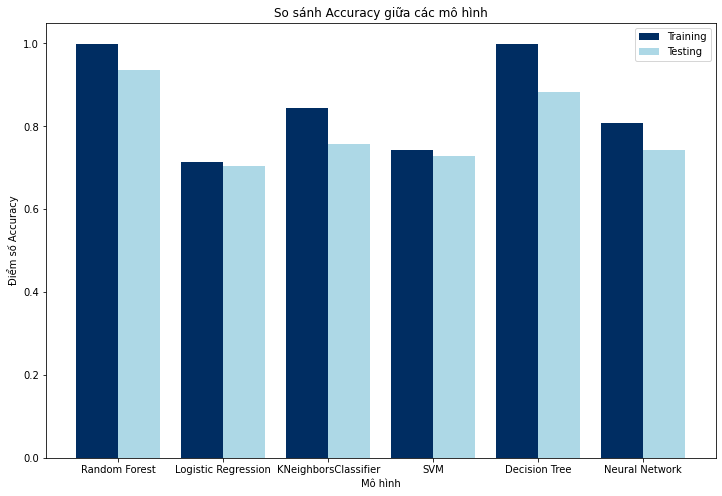

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_accur_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_accur_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Accuracy")
plt.title("So sánh Accuracy giữa các mô hình")
plt.legend()
plt.show()

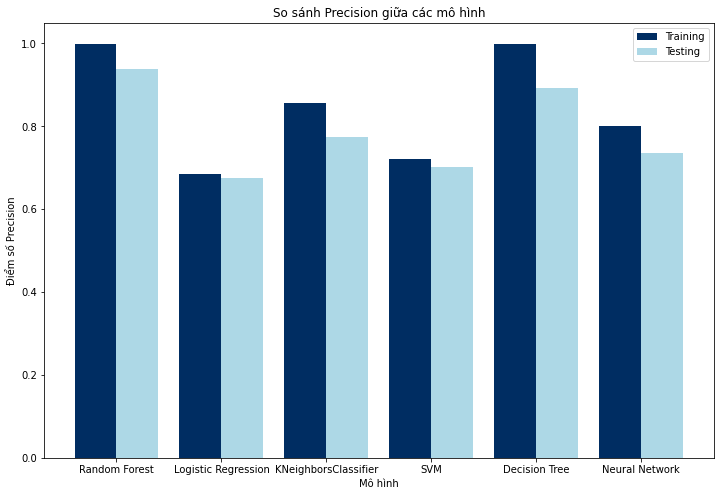

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_prec_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_prec_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Precision")
plt.title("So sánh Precision giữa các mô hình")
plt.legend()
plt.show()

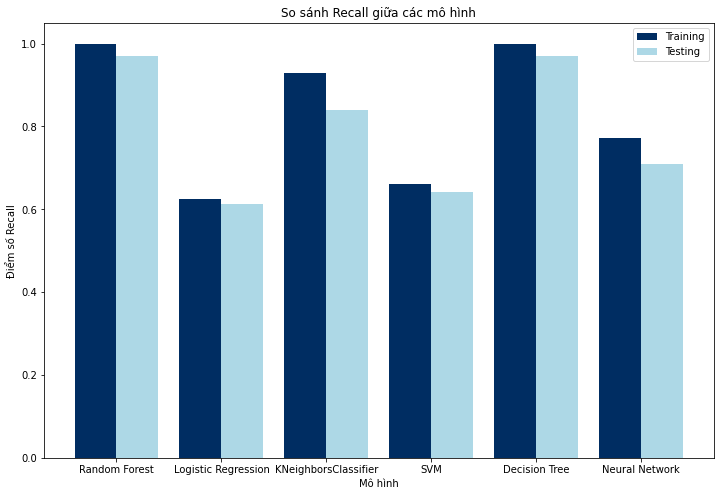

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_recc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_recc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Recall")
plt.title("So sánh Recall giữa các mô hình")
plt.legend()
plt.show()

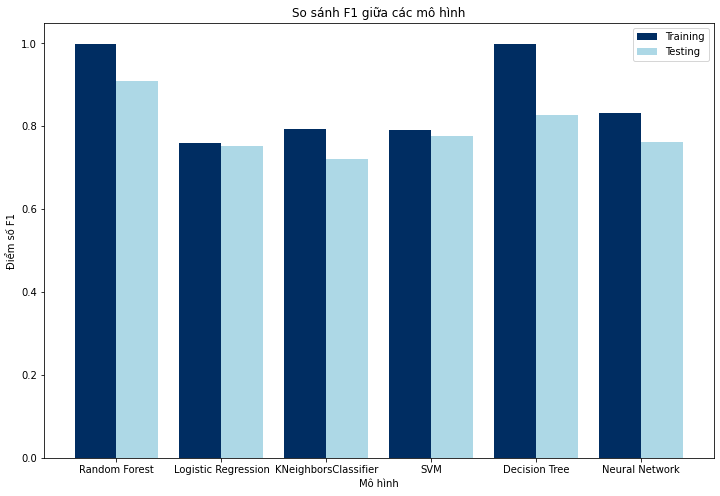

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_f1_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_f1_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số F1")
plt.title("So sánh F1 giữa các mô hình")
plt.legend()
plt.show()

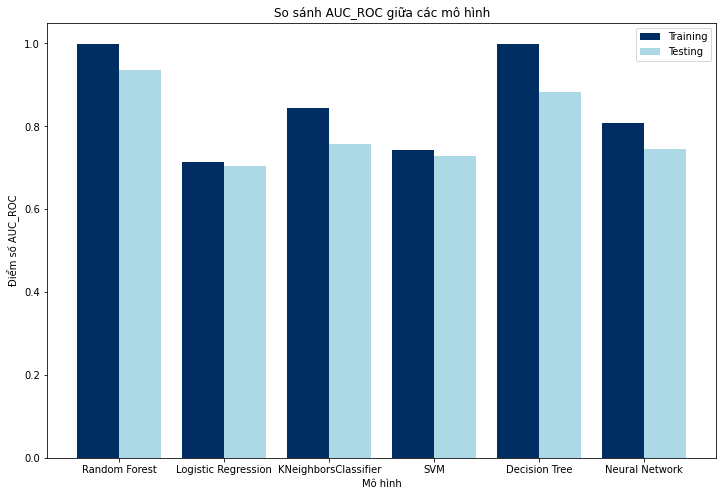

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_auc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_auc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số AUC_ROC")
plt.title("So sánh AUC_ROC giữa các mô hình")
plt.legend()
plt.show()

### SMOTE


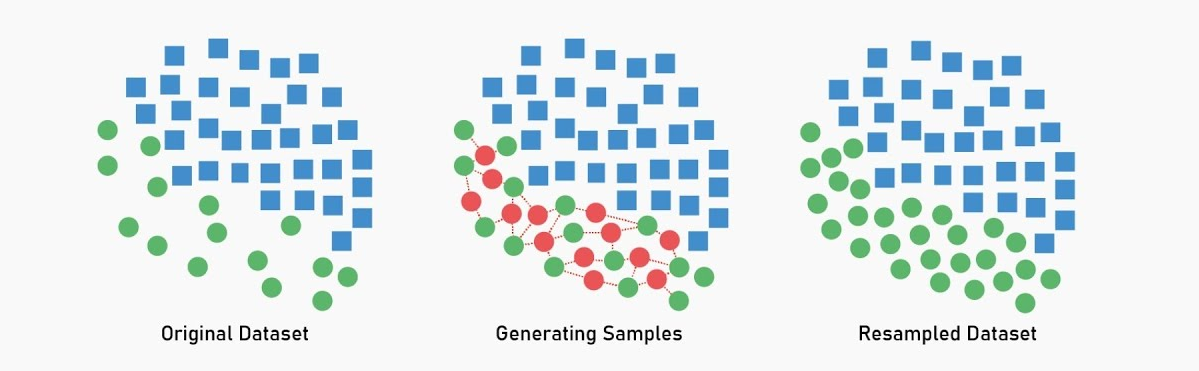

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
over_sam = SMOTETomek(sampling_strategy="minority", random_state=42)


In [ ]:
X_res, y_res = over_sam.fit_resample(X, y)

# Tạo tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
# Transfrom để có phân phối Gauss
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# Clear list for visualization
clear_list()

In [ ]:
report_5= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9995
- Recall: 0.9995
- Roc Auc Score: 0.9995
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8793
- F1 score: 0.9109
- Precision: 0.8750
- Recall: 0.8418
- Roc Auc Score: 0.8794


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8466
- F1 score: 0.8935
- Precision: 0.8367
- Recall: 0.7867
- Roc Auc Score: 0.8466
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8475
- F1 score: 0.8942
- Precision: 0.8387
- Recall: 0.7897
- Roc Auc Score: 0.8477


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8922
- F1 score: 0.8969
- Precision: 0.8915
- Recall: 0.8861
- Roc Auc Score: 0.8922
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8406
- F1 score: 0.8413
- Precision: 0.8412
- Recal

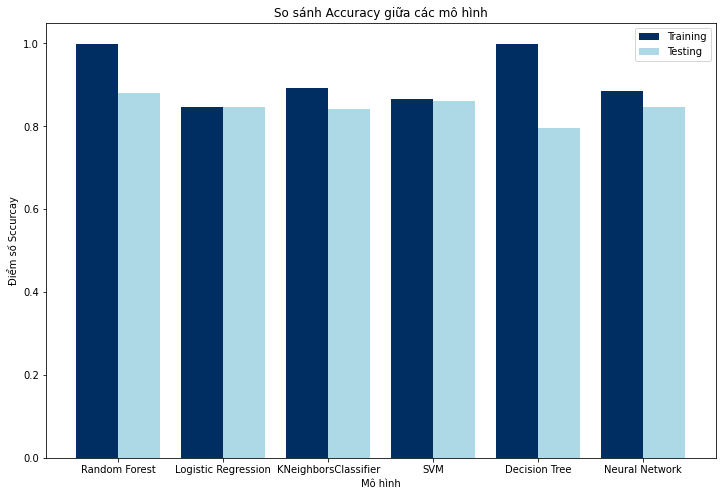

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_accur_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_accur_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Sccurcay")
plt.title("So sánh Accuracy giữa các mô hình")
plt.legend()
plt.show()

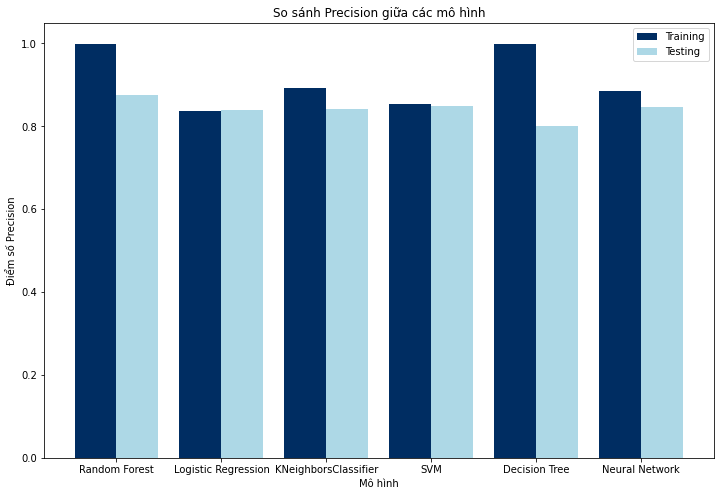

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_prec_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_prec_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Precision")
plt.title("So sánh Precision giữa các mô hình")
plt.legend()
plt.show()

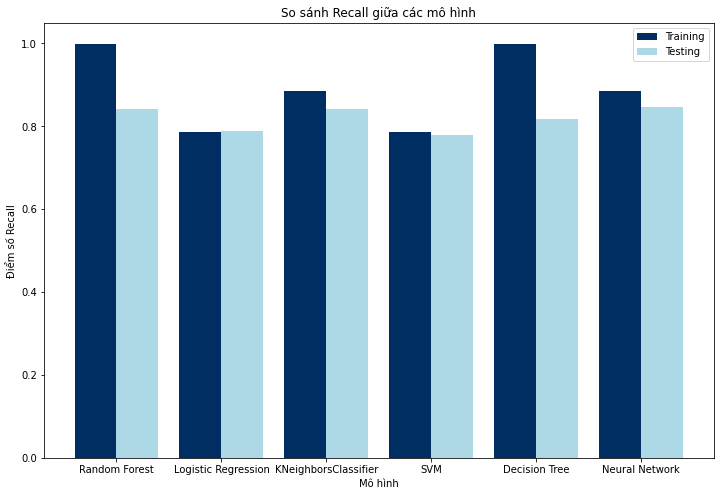

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_recc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_recc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số Recall")
plt.title("So sánh Recall giữa các mô hình")
plt.legend()
plt.show()

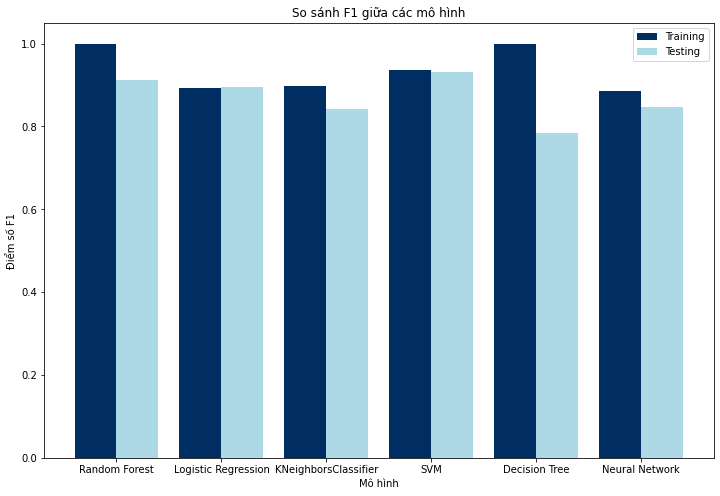

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_f1_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_f1_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số F1")
plt.title("So sánh F1 giữa các mô hình")
plt.legend()
plt.show()

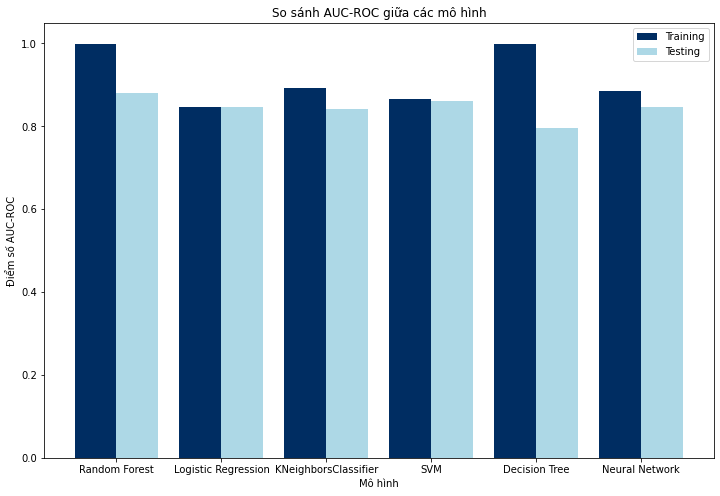

In [ ]:
plt.figure(figsize=(12,8))
X_axis = np.arange(len(models_list))
plt.bar(X_axis - 0.2, list_auc_train, 0.4, label = 'Training', color='#002D62')
plt.bar(X_axis + 0.2, list_auc_test, 0.4, label = 'Testing', color='#ADD8E6')
plt.xticks(X_axis, models_list)
plt.xlabel("Mô hình")
plt.ylabel("Điểm số AUC-ROC")
plt.title("So sánh AUC-ROC giữa các mô hình")
plt.legend()
plt.show()

In [ ]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [ ]:
pd.DataFrame({'Classifier':models_list, 'Train Accuracy': list_accur_train, 'Test Accuracy': list_accur_test, 'Precision Score': list_prec_test, 'Recall Score': list_recc_test, 'F1 Score': list_f1_test })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Random Forest,0.999478,0.879257,0.874986,0.841760,0.910943
1,Logistic Regression,0.846619,0.847506,0.838680,0.789670,0.894176
2,KNeighborsClassifier,0.892216,0.840584,0.841195,0.841103,0.841287
3,SVM,0.866148,0.860141,0.848326,0.779164,0.930962
4,Decision Tree,0.999478,0.795539,0.800515,0.817247,0.784454
5,Neural Network,0.885294,0.846407,0.846945,0.846575,0.847317


# Lựa chọn mô hình


In [ ]:
clf_RandForest = RandomForestClassifier()
clf_RandForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict_test = clf_RandForest.predict(X_test)
predict_train = clf_RandForest.predict(X_train)

In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[4139  394]
 [ 724 3845]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4533
           1       0.91      0.84      0.87      4569

    accuracy                           0.88      9102
   macro avg       0.88      0.88      0.88      9102
weighted avg       0.88      0.88      0.88      9102



In [ ]:
score = roc_auc_score(y_train, predict_train)
print(f"ROC AUC: {score:.4f}")


ROC AUC: 0.9995


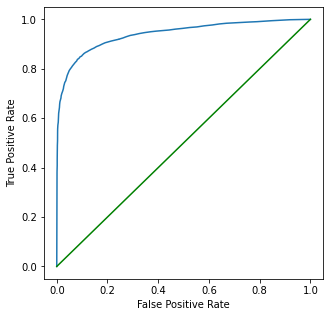

In [ ]:
# Vẽ ROC curve của mô hình
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_proba = clf_RandForest.predict_proba(X_test)
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

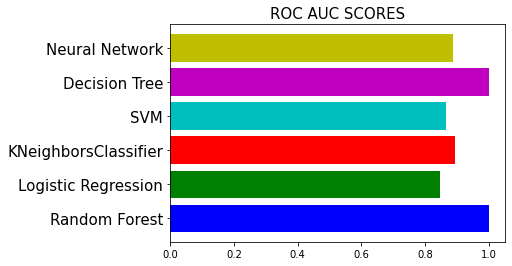

In [ ]:
plt.yticks(range(len( list_auc_train)), models_list,fontsize=15)
plt.title('ROC AUC SCORES',fontsize=15)
plt.barh(range(len( list_auc_train)), list_auc_train, color='bgrcmy')
plt.show()

In [ ]:
#Lưu kết quả dự đoán dưới dạng Excel
pred_result =  pd.DataFrame(predict_test.tolist ())
pred_result.to_excel("pred_result.xlsx")
y_test.to_excel("Y_test.xlsx")

# Kết luận

EDA
* Khách hàng có khả năng vỡ nợ ít hơn khách hàng không có khả năng vỡ nợ.
* Khách hàng nữ nắm giữ nhiều thẻ tín dụng hơn khách hàng nam
* Số lượng chủ thẻ tín dụng giảm dần theo: đại học > tốt nghiệp > học sinh trung học
* Số lượng khách hàng độc thân có thể tín dụng chiếm xác suất nhiều hơn nhóm khác
* Khả năng vỡ nợ chủ yếu xảy ra khi hạn mức tín dụng ít hơn 2000000
* Xác suất khách hàng thanh toán chậm trên 2 tháng rất ít
* Số tiền thanh toán của khách hàng có khả năng vỡ nợ ít hơn so với khách hàng không có khả năng vỡ nợ


* Biến PAY_1 là rất quan trọng đối với bộ dữ liệu, biến này không chỉ cho biết hành vi thanh toán của khách hàng trong tháng 9 mà còn chỉ ra hành vi của khách hàng từ tháng 4 đến tháng 9. Vì vậy, khi doanh nghiệp xem xét phát hành thẻ tín dụng cho khách hàng, điều này rất quan trọng đối với doanh nghiệp, họ có thể kiểm tra lịch sử thanh toán của khách hàng để biết khách hàng này có thanh toán đúng hạn hay không hoặc có nợ hóa đơn nào chưa thanh toán hay không.

* Đối với những khách hàng thanh toán đúng hạn, có xu hướng có điểm tín dụng tốt hơn nên các ngân hàng muốn tăng hạn mức tín dụng của những khách hàng này, chấp nhận ít rủi ro hơn. Do đó, nếu một khách hàng tiềm năng đã có thẻ tín dụng với hạn mức tín dụng cao , khách hàng này rất khó có khả năng vỡ nợ trong tương lai.

* Mặc dù tổ chức tài chính thường thu thập thông tin cá nhân của khách hàng như tuổi, trình độ học vấn và tình trạng hôn nhân khi mọi người đăng ký thẻ tín dụng. Nói cách khác, tổ chức tài chính cũng nên xem khách hàng tiềm năng của họ là nam hay nữ, có bằng cử nhân hay thạc sĩ, độc thân hay đã kết hôn khi quyết định xem có chấp nhận đơn xin mở thẻ tín dụng/cho vay của họ hay không.

* Hạn mức tín dụng là một chỉ số tốt về sự ổn định tài chính. Bất kỳ cơ chế nào mà ngân hàng hiện đang sử dụng đều hoạt động tốt và một số tính năng liên quan đến việc chọn hạn mức tín dụng có thể được sử dụng trong mô hình trực tiếp để dự đoán khả năng vỡ nợ.
* Các chuyên gia kinh doanh và nhóm Machine Learning phải thảo luận về việc đánh đổi khả năng thu hồi chính xác để thu được nhiều lợi ích nhất từ mô hình dự đoán.
Ngân hàng có thể sử dụng mô hình này không chỉ như một công cụ dự đoán mà còn chủ động ngăn chặn tình trạng vỡ nợ.